In [1]:
import numpy as np
import random
import scipy as sp
import pandas as pd
import seaborn as sns
import sklearn.linear_model
import matplotlib.pyplot as plt
from statsmodels.api import OLS
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import gaussian_kde as GKDE
from scipy.stats import uniform, norm, beta,skewnorm,gamma, beta, f_oneway, wilcoxon,kruskal, ranksums
from mpl_toolkits import mplot3d
import scipy.io as sio
from statsmodels.distributions.empirical_distribution import ECDF
from joblib import dump, load
from astropy.table import Table, Column
import scikit_posthocs as sp
from utils import *

In [2]:
pip install utils

Note: you may need to restart the kernel to use updated packages.


In [3]:
nSamp = 10000
#nItr=200
nItr=10000
seedinit1 = 1
as1=np.zeros(nSamp)
as2=np.zeros(nSamp)
np.random.seed(seedinit1)
SV=np.random.uniform(0.15,0.5,1)   
unifs1=np.random.uniform(0,1,nSamp)
for i in range(nSamp):
    if unifs1[i] <= SV:
        as1[i]=1

seedinit2 = seedinit1+1
np.random.seed(seedinit2)            
unifs2=np.random.uniform(0,1,nSamp)
for j in range(nSamp):
    if unifs2[j] <= SV:
        as2[j]=1
    
Xs=as1+as2

In [4]:
Xs_bar=np.mean(Xs)
Sxx = np.sum(Xs*Xs)-nSamp*Xs_bar*Xs_bar

sigma=.9

SEb= np.sqrt(sigma/Sxx)
print(SEb)

print()
SEe=.9-SEb
print(SEe)

0.014593989375535759

0.8854060106244642


In [5]:
N0=0
N1=0
N2=0
for i in range(nSamp):
    if Xs[i]==0 :
        N0=N0+1
    elif Xs[i]==1:
        N1=N1+1
    else:
        N2=N2+1

print(N0)
print(N1)
print(N2) 

4826
4251
923


In [6]:
seedinit3 = seedinit2+1
np.random.seed(seedinit3)

#B= np.random.uniform(low=-2.5, high=2.5, size=1000)
#alpha=np.random.uniform(0,0.05,1)
B0= norm.rvs(loc=0.0282, scale=.75, size=N0)
B1= norm.rvs(loc=.10438,   scale=.75, size=N1)
B2= norm.rvs(loc=.2526 , scale=.75, size=N2)

e0=np.random.normal(0, SEb,size=N0)
e1=np.random.normal(0, SEb,size=N1)
e2=np.random.normal(0, SEb,size=N2)


#B=np.repeat(B,nSamp)
#Xs=np.tile(Xs,nItr)
#e=np.tile(e,nItr)

y_obs0=B0+e0
y_obs1=B1+e1
y_obs2=B2+e2

#y_obs = np.random.uniform(low=-5, high=5, size=nSamp)
#y_obs = skewnorm.rvs(1,loc=-.45, scale=1.7,size=nSamp)

#kde_y_obs= GKDE(y_obs)


index0=np.where(Xs == 0)
index1=np.where(Xs == 1)
index2=np.where(Xs == 2)

Xs0=Xs[index0]
Xs1=Xs[index1]
Xs2=Xs[index2]

#y_obs0=y_obs[index0]
#y_obs1=y_obs[index1]
#y_obs2=y_obs[index2]

kde_y_obs0= GKDE(y_obs0)
kde_y_obs1= GKDE(y_obs1)
kde_y_obs2= GKDE(y_obs2)

In [7]:
print(B0.mean())
print(B1.mean())
print(B2.mean())

-0.0009266107698947614
0.10006408547329988
0.2000250333508872


In [8]:
y_obs0_bar=np.mean(y_obs0)

Sy0 = np.sum(y_obs0*y_obs0)-N0*y_obs0_bar*y_obs0_bar

SEy0= np.sqrt(Sy0/(N0-1))


y_obs1_bar=np.mean(y_obs1)

Sy1 = np.sum(y_obs1*y_obs1)-N1*y_obs1_bar*y_obs1_bar

SEy1= np.sqrt(Sy1/(N1-1))


y_obs2_bar=np.mean(y_obs2)

Sy2 = np.sum(y_obs2*y_obs2)-N2*y_obs2_bar*y_obs2_bar

SEy2= np.sqrt(Sy2/(N2-1))

y=np.concatenate((y_obs0, y_obs1,y_obs2), axis=None) 

Xs=np.concatenate((Xs0,Xs1,Xs2), axis=None) 
print(SEy0)
print(SEy1)
print(SEy2)

0.7473665327171599
0.7497725504964229
0.7312497278648243


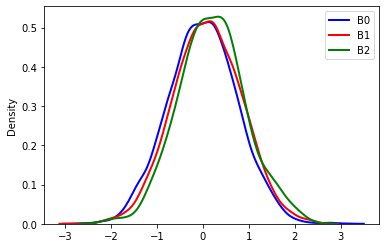

In [9]:
ax=sns.kdeplot(B0,color='b',label='B0',linewidth=2)
ax=sns.kdeplot(B1,color='r',label='B1',linewidth=2)
ax=sns.kdeplot(B2,color='g',label='B2',linewidth=2)
ax.legend()

In [10]:
print(y_obs0_bar)
print(y_obs1_bar)
print(y_obs2_bar)

-0.000660600266853289
0.09977977328801715
0.20020086911220228


In [11]:
print(B0.mean())
print(B1.mean())
print(B2.mean())

-0.0009266107698947614
0.10006408547329988
0.2000250333508872


In [12]:
print(np.max(y))
print(np.min(y))
print(np.std(y))
print(np.mean(y))

3.095379479339673
-2.717126314592869
0.7496568288675887
0.060576116155008956


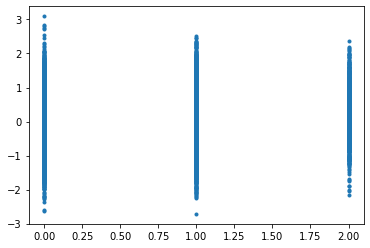

In [13]:
plt.plot(Xs, y,'.')

Parametrs =  -0.000658810261801146 [0.10043452]


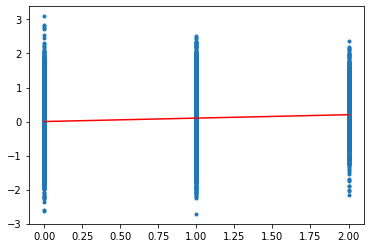

In [14]:
#X=np.concatenate((Xs0, Xs1,Xs2), axis=None) 

lin_reg= sklearn.linear_model.LinearRegression()
lin_reg.fit(np.c_[Xs],y)
print('Parametrs = ', lin_reg.intercept_ ,  lin_reg.coef_)

plt.plot(Xs, y,'.');
plt.plot(np.array([0, 2]), lin_reg.predict(np.c_[np.array([0,2])]), color='r');

In [15]:
X = sm.add_constant(Xs)
est = sm.OLS(y, X)  #sm.OLS(y , sm.add_constant(Xs)).fit()
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     76.41
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           2.67e-18
Time:                        14:18:06   Log-Likelihood:                -11270.
No. Observations:               10000   AIC:                         2.254e+04
Df Residuals:                    9998   BIC:                         2.256e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0007      0.010     -0.064      0.9

In [16]:
est2.pvalues[1]

2.674064472585319e-18

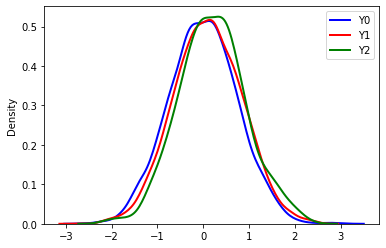

In [17]:
ax=sns.kdeplot(y_obs0,color='b',label='Y0',linewidth=2)
ax=sns.kdeplot(y_obs1,color='r',label='Y1',linewidth=2)
ax=sns.kdeplot(y_obs2,color='g',label='Y2',linewidth=2)
ax.legend()

In [18]:
seedinit4 = seedinit3+1
np.random.seed(seedinit4)
#alpha=np.random.uniform(0,0.1,1) 
Beta0=norm.rvs(loc=y_obs0_bar, scale=SEy0,size=N0)
Beta1=norm.rvs(loc=y_obs1_bar, scale=SEy1,size=N1)
Beta2=norm.rvs(loc=y_obs2_bar, scale=SEy2,size=N2)

In [20]:
#alpha=np.random.uniform(0,0.05,1) 

seedinit5 = seedinit4+1
np.random.seed(seedinit5)

eps0=np.random.normal(0,.35,size=N0)
eps1=np.random.normal(0,.35,size=N1)
eps2=np.random.normal(0,.35,size=N2)

In [21]:
y_initi0=Beta0+eps0
y_initi1=Beta1+eps1
y_initi2=Beta2+eps2


kde_y_initi0 = GKDE(y_initi0)
kde_y_initi1 = GKDE(y_initi1)
kde_y_initi2 = GKDE(y_initi2)

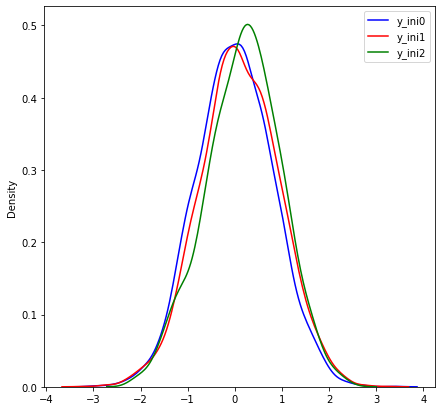

In [22]:
plt.figure(figsize=[7,7])

ax=sns.kdeplot(y_initi0,color='b',label='y_ini0',alpha=0.5)
ax=sns.kdeplot(y_initi1,color='r',label='y_ini1')
ax=sns.kdeplot(y_initi2,color='g',label='y_ini2')
ax.legend()

In [23]:
def rejection_sampling(r): # creating indexes for samples to keep from initial samples using rejection sampling 
    N = r.size 
    seedinit6 = seedinit5+1
    np.random.seed(seedinit6)
    reject_prob = np.random.uniform(low=0, high=1, size=N) 
    r = r/np.max(r)
    idx = np.where(r >= reject_prob)[0]
    return idx

In [24]:
r0=np.divide(kde_y_obs0(y_initi0),kde_y_initi0(y_initi0))
r1=np.divide(kde_y_obs1(y_initi1),kde_y_initi1(y_initi1))
r2=np.divide(kde_y_obs2(y_initi2),kde_y_initi2(y_initi2))

In [25]:
samples_to_keep0 = rejection_sampling(r0) # performing rejection sampling
samples_to_keep1 = rejection_sampling(r1)
samples_to_keep2 = rejection_sampling(r2)


accept_rate0 = samples_to_keep0.size/Beta0.shape[0]# computing acceptance rate from performing rejection sampling
accept_rate1 = samples_to_keep1.size/Beta1.shape[0]
accept_rate2 = samples_to_keep2.size/Beta2.shape[0]


print("accept_rate0=",accept_rate0) # printing acceptance rate 
print()
print("accept_rate1=",accept_rate1)
print()
print("accept_rate2=",accept_rate2)
print()

print("Mean(r0)=",np.mean(r0))
print()
print("Mean(r1)=",np.mean(r1))
print()
print("Mean(r2)=",np.mean(r2))

accept_rate0= 0.5745959386655616

accept_rate1= 0.8612091272641731

accept_rate2= 0.8028169014084507

Mean(r0)= 1.0016343908763963

Mean(r1)= 1.0026345005268136

Mean(r2)= 1.0020472742771795


In [26]:
updated_Beta0 =Beta0[samples_to_keep0] # samples from updated parameter density
updated_Beta1 =Beta1[samples_to_keep1]
updated_Beta2 =Beta2[samples_to_keep2]

updated_y0 =y_initi0[samples_to_keep0] # samples from updated QoI density
updated_y1 =y_initi1[samples_to_keep1] 
updated_y2 =y_initi2[samples_to_keep2] 


kde_updated_y0 = GKDE(y_initi0, weights=r0)
kde_updated_y1 = GKDE(y_initi1, weights=r1)
kde_updated_y2 = GKDE(y_initi2, weights=r2) # updated QoI density


kde_updated_Beta0 = GKDE(Beta0, weights=r0)
kde_updated_Beta1 = GKDE(Beta1, weights=r1)
kde_updated_Beta2 = GKDE(Beta2, weights=r2)

In [27]:
updated_eps0 =eps0[samples_to_keep0]
updated_eps1 =eps1[samples_to_keep1] 
updated_eps2 =eps2[samples_to_keep2]

kde_updated_eps0 = GKDE(eps0, weights=r0)
kde_updated_eps1 = GKDE(eps1, weights=r1)
kde_updated_eps2 = GKDE(eps2, weights=r2)

In [28]:
stats.kruskal(updated_Beta0, updated_Beta1, updated_Beta2)

KruskalResult(statistic=60.57939534936668, pvalue=7.004085539041448e-14)

In [29]:
f_oneway(updated_Beta0, updated_Beta1, updated_Beta2)

F_onewayResult(statistic=31.97369384822426, pvalue=1.498101440132958e-14)

In [393]:
Dunn=sp.posthoc_dunn([updated_Beta0,updated_Beta1,updated_Beta2], p_adjust = 'bonferroni')
Dunn

1             2             3
1  1.000000e+00  8.621043e-08  1.305048e-08
2  8.621043e-08  1.000000e+00  6.427533e-03
3  1.305048e-08  6.427533e-03  1.000000e+00

In [394]:
sp.posthoc_dunn([Beta0,Beta1,Beta2], p_adjust = 'bonferroni')

1             2             3
1  1.000000e+00  2.920324e-11  7.183708e-13
2  2.920324e-11  1.000000e+00  2.884826e-03
3  7.183708e-13  2.884826e-03  1.000000e+00

In [264]:
sp.posthoc_dunn([B0,B1,B2], p_adjust = 'bonferroni')

1             2             3
1  1.000000e+00  1.516059e-08  4.771397e-11
2  1.516059e-08  1.000000e+00  3.098264e-03
3  4.771397e-11  3.098264e-03  1.000000e+00

In [30]:
nSamp = 10000
nIter = 200
seedinit1 = 1
ac1=np.zeros((nSamp,nIter))
ac2=np.zeros((nSamp,nIter))
CV=np.zeros(nIter)
for j in range(nIter):
    seedinit1 = seedinit1 + j
    np.random.seed(seedinit1)
    CV[j]=np.random.uniform(0.5,0.15,1)
    
    unifc1=np.random.uniform(0,1,nSamp)
    unifc2=np.random.uniform(0,1,nSamp)
    
    for i in range(nSamp):
        if unifc1[i] <= CV[j]:
            ac1[i,j]=1
            
    for k in range(nSamp):
        if unifc2[k] <= CV[j]:
            ac2[k,j]=1
            
Xs=ac1+ac2
Xs.shape

(10000, 200)

In [31]:
N=np.zeros((3,nIter))

for j in range(nIter):
    for i in range(nSamp):
        if Xs[i,j]==0 :
            N[0,j]+= 1
        elif Xs[i,j]==1:
            N[1,j] += 1
        else:
            N[2,j]+= 1

In [32]:
Xs_bar = np.zeros(nIter)
SEb = np.zeros(nIter)
SEe=np.zeros(nIter)
for j in range(nIter):
    Xs_bar[j]=np.mean(Xs[:,j])
    Sxx = np.sum(Xs[:,j]*Xs[:,j])-nSamp*Xs_bar[j]*Xs_bar[j]
    sigma=.9
    SEb[j]= np.sqrt(sigma/Sxx)
    SEe[j]=.9-SEb[j]

In [33]:
B = np.zeros((nSamp,nIter))
e = np.zeros((nSamp,nIter))
y_obs= np.zeros((nSamp,nIter))
seedinit2 = seedinit1+1
for j in range(nIter):    
    seedinit2 = seedinit2+j
    np.random.seed(seedinit2)
    #alpha=np.random.uniform(0,0.3,1)
    B[0:int(N[0,j]),j] = norm.rvs(loc=0.0272 , scale=.7, size=int(N[0,j]))
    B[int(N[0,j]):int(N[0,j])+int(N[1,j]),j] = norm.rvs(loc=.10408, scale=.7, size=int(N[1,j]))
    B[int(N[0,j])+int(N[1,j]):nSamp,j] = norm.rvs(loc=.2491 , scale=.7, size=int(N[2,j]))
    
    e[0:int(N[0,j]),j]=np.random.normal(0,SEb[j] ,size=int(N[0,j]))
    e[int(N[0,j]):int(N[0,j])+int(N[1,j]),j]=np.random.normal(0,SEb[j],size=int(N[1,j]))
    e[int(N[1,j])+int(N[0,j]):nSamp,j]=np.random.normal(0,SEb[j],size=int(N[2,j]))
    
y_obs=B+e

In [34]:
y_obs_bar = np.zeros((3,nIter))
SEy=np.zeros((3,nIter))
Sy=np.zeros(3)
for j in range(nIter):
        y_obs_bar[0,j]=np.mean(y_obs[0:int(N[0,j]),j])
        y_obs_bar[1,j]=np.mean(y_obs[int(N[0,j]):int(N[1,j])+int(N[0,j]),j])
        y_obs_bar[2,j]=np.mean(y_obs[int(N[1,j])+int(N[0,j]):nSamp,j])
        Sy[0]= np.sum(y_obs[0:int(N[0,j]),j]*y_obs[0:int(N[0,j]),j])-N[0,j]*y_obs_bar[0,j]*y_obs_bar[0,j]
        Sy[1]= np.sum(y_obs[int(N[0,j]):int(N[0,j])+int(N[1,j]),j]*y_obs[int(N[0,j]):int(N[1,j])+int(N[0,j]),j])-N[1,j]*y_obs_bar[1,j]*y_obs_bar[1,j]
        Sy[2]= np.sum(y_obs[int(N[1,j])+int(N[0,j]):nSamp,j]*y_obs[int(N[1,j])+int(N[0,j]):nSamp,j])-N[2,j]*y_obs_bar[2,j]*y_obs_bar[2,j]
        SEy[0,j]= np.sqrt(Sy[0]/(int(N[0,j])-1))
        SEy[1,j]= np.sqrt(Sy[1]/(int(N[1,j])-1))
        SEy[2,j]= np.sqrt(Sy[2]/(int(N[2,j])-1))

In [35]:
Beta = np.zeros((nSamp,nIter))
eps = np.zeros((nSamp,nIter))
y_initi= np.zeros((nSamp,nIter))
seedinit3 = seedinit2+1
for j in range(nIter):    
    seedinit3 = seedinit3+j
    np.random.seed(seedinit3)
    Beta[0:int(N[0,j]),j] = norm.rvs(loc=y_obs_bar[0,j] , scale=SEy[0,j], size=int(N[0,j]))
    Beta[int(N[0,j]):int(N[1,j])+int(N[0,j]),j] = norm.rvs(loc=y_obs_bar[1,j], scale=SEy[1,j], size=int(N[1,j]))
    Beta[int(N[1,j])+int(N[0,j]):nSamp,j] = norm.rvs(loc=y_obs_bar[2,j] , scale=SEy[2,j], size=int(N[2,j]))
    
    eps[0:int(N[0,j]),j]=np.random.normal(0,.35,size=int(N[0,j]))
    eps[int(N[0,j]):int(N[1,j])+int(N[0,j]),j]=np.random.normal(0,.35,size=int(N[1,j]))
    eps[int(N[1,j])+int(N[0,j]):nSamp,j]=np.random.normal(0,.35,size=int(N[2,j]))
    
y_initi=Beta+eps

In [36]:
r = np.zeros((nSamp,nIter))
for j in range(nIter):
            kde_y_obs0=GKDE(y_obs[0:int(N[0,j]),j])
            kde_y_initi0=GKDE(y_initi[0:int(N[0,j]),j])
            r[0:int(N[0,j]),j]=np.divide(kde_y_obs0(y_initi[0:int(N[0,j]),j]),kde_y_initi0(y_initi[0:int(N[0,j]),j]))
            kde_y_obs1=GKDE(y_obs[int(N[0,j]):int(N[1,j])+int(N[0,j]),j])
            kde_y_initi1=GKDE(y_initi[int(N[0,j]):int(N[1,j])+int(N[0,j]),j])
            r[int(N[0,j]):int(N[1,j])+int(N[0,j]),j]=np.divide(kde_y_obs1(y_initi[int(N[0,j]):int(N[1,j])+int(N[0,j]),j]),kde_y_initi1(y_initi[int(N[0,j]):int(N[1,j])+int(N[0,j]),j]))
            kde_y_obs2=GKDE(y_obs[int(N[1,j])+int(N[0,j]):nSamp,j])
            kde_y_initi2=GKDE(y_initi[int(N[0,j])+int(N[1,j]):nSamp,j])
            r[int(N[0,j])+int(N[1,j]):nSamp,j]=np.divide(kde_y_obs2(y_initi[int(N[0,j])+int(N[1,j]):nSamp,j]),kde_y_initi2(y_initi[int(N[0,j])+int(N[1,j]):nSamp,j]))
            

In [37]:
def rejection_sampling(r): # creating indexes for samples to keep from initial samples using rejection sampling 
    N = r.size 
    seedinit4 = seedinit3+1
    np.random.seed(seedinit4)
    reject_prob = np.random.uniform(low=0, high=1, size=N) 
    r = r/np.max(r)
    idx = np.where(r >= reject_prob)[0]
    return idx

In [38]:
samples_to_keepSize=np.zeros((3,nIter))
accept_rate=np.zeros((3,nIter))
for j in range(nIter):
    samples_to_keepSize[0,j] = rejection_sampling(r[0:int(N[0,j]),j]).size
    samples_to_keepSize[1,j]=rejection_sampling(r[int(N[0,j]):int(N[1,j])+int(N[0,j]),j]).size
    samples_to_keepSize[2,j] = rejection_sampling(r[int(N[1,j])+int(N[0,j]):nSamp,j]).size


    accept_rate[0,j] = samples_to_keepSize[0,j]/N[0,j]
    accept_rate[1,j] = samples_to_keepSize[1,j]/N[1,j]
    accept_rate[2,j] = samples_to_keepSize[2,j]/N[2,j]

In [39]:
samples_to_keep=np.zeros((nSamp,nIter))

for j in range(nIter):
    samples_to_keep[0:int(samples_to_keepSize[0,j]),j]= rejection_sampling(r[0:int(N[0,j]),j])
    samples_to_keep[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j]= rejection_sampling(r[int(N[0,j]):int(N[0,j])+int(N[1,j]),j])+int(N[0,j])
    samples_to_keep[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j]= rejection_sampling(r[int(N[0,j])+int(N[1,j]):nSamp,j])+int(N[0,j])+int(N[1,j])
    
    

In [40]:
updated_Beta=np.zeros((nSamp,nIter))
updated_y=np.zeros((nSamp,nIter))
updated_eps=np.zeros((nSamp,nIter))
for j in range(nIter):
    updated_Beta[0:int(samples_to_keepSize[0,j]),j] =Beta[samples_to_keep[0:int(samples_to_keepSize[0,j]),j].astype(int),j]
    updated_Beta[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j] =Beta[samples_to_keep[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j].astype(int),j]
    updated_Beta[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j] =Beta[samples_to_keep[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j].astype(int),j]
    
    updated_y[0:int(samples_to_keepSize[0,j]),j] =y_initi[samples_to_keep[0:int(samples_to_keepSize[0,j]),j].astype(int),j]
    updated_y[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j] =y_initi[samples_to_keep[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j].astype(int),j]
    updated_y[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j] =y_initi[samples_to_keep[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j].astype(int),j]
    
    updated_eps[0:int(samples_to_keepSize[0,j]),j] =eps[samples_to_keep[0:int(samples_to_keepSize[0,j]),j].astype(int),j]
    updated_eps[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j] =eps[samples_to_keep[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j].astype(int),j]
    updated_eps[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j] =eps[samples_to_keep[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j].astype(int),j]
    

In [41]:
KruskalStat=np.zeros(nIter)
KruskalPvalue=np.zeros(nIter)
for j in range(nIter):
    KruskalStat[j]=stats.kruskal(updated_Beta[0:int(samples_to_keepSize[0,j]),j], updated_Beta[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j],updated_Beta[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j])[0]
    KruskalPvalue[j]=stats.kruskal(updated_Beta[0:int(samples_to_keepSize[0,j]),j], updated_Beta[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j],updated_Beta[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j])[1]
    

In [42]:
fStat=np.zeros(nIter)
fPvalue=np.zeros(nIter)
for j in range(nIter):
    fStat[j]=f_oneway(updated_Beta[0:int(samples_to_keepSize[0,j]),j], updated_Beta[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j],updated_Beta[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j])[0]
    fPvalue[j]=f_oneway(updated_Beta[0:int(samples_to_keepSize[0,j]),j], updated_Beta[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j],updated_Beta[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j])[1]
    



In [43]:
fPvalue.max()

5.4389822444102206e-05

In [44]:
fPvalue.min()

9.212971994230611e-40

In [45]:
(fPvalue >.00000005).sum()

5

In [58]:
(200-5)/200

0.975

In [47]:
KruskalPvalue.max()

9.06260232706235e-05

In [59]:
KruskalPvalue.min()

1.1829122786379157e-37

In [48]:
(KruskalPvalue >.00000005).sum()

8

In [55]:
(200-8)/200

0.96

In [50]:
for j in range(nIter):
    index0=np.where(Xs[:,j] == 0)
    index1=np.where(Xs[:,j] == 1)
    index2=np.where(Xs[:,j] == 2)
    Xs0=Xs[:,j][index0]
    Xs1=Xs[:,j][index1]
    Xs2=Xs[:,j][index2]
    Xs[:,j]=np.concatenate((Xs0,Xs1,Xs2), axis=None) 

In [51]:
#X=np.zeros((nSamp,2))
OLS_Pvalues=np.zeros(nIter)
for j in range(nIter):
    X=sm.add_constant(Xs[:,j])
    est=sm.OLS(y_obs[:,j],X).fit()
    OLS_Pvalues[j]=est.pvalues[1]



In [52]:
OLS_Pvalues.max()

8.491864144243868e-07

In [53]:
OLS_Pvalues.min()

1.6842602518881864e-36

In [54]:
(OLS_Pvalues >.00000005).sum()

5

In [56]:
(200-5)/200

0.975

NameError: name 'df' is not defined

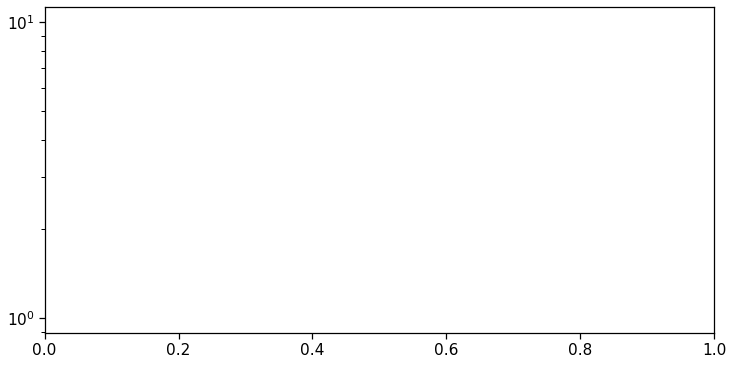

In [575]:
def get_log_ax(orient="v"):
    if orient == "v":
        figsize = (12, 6)
        set_scale = "set_yscale"
    else:
        figsize = (10, 8)
        set_scale = "set_xscale"
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    fig.patch.set_alpha(1)
    getattr(ax, set_scale)("log")
    return ax



with sns.plotting_context("notebook", font_scale=1.4):
    # Create new plot, setting a logarithmic scale for y
    ax = get_log_ax()

    # Plot with seaborn
    sns.boxplot(ax=ax, data=df, palette=states_palette)

    # Label (adds axes labels and title), and show
    #label_plot_for_subcats(ax)
    #plt.savefig("plot1.png")

In [1485]:
df_Pvalue

UQ  GWAS
0    0.0   0.0
1    0.0   0.0
2    0.0   0.0
3    0.0   0.0
4    0.0   0.0
..   ...   ...
195  0.0   0.0
196  0.0   0.0
197  0.0   0.0
198  0.0   0.0
199  0.0   0.0

[200 rows x 2 columns]

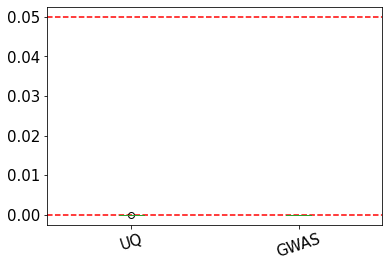

In [1484]:

df_Pvalue = pd.DataFrame({"UQ": KruskalPvalue,
                   "GWAS": OLS_Pvalues})
df_Pvalue.boxplot(grid=False, rot=18, fontsize=15)
left, right = plt.xlim()
reference = [.00000005, 0.05]
plt.hlines(reference, xmin=left, xmax=right, color='r', linestyles='--')
#plt.subplots_adjust(bottom=0.05)
#plt.ylim(0, 1)
plt.show()

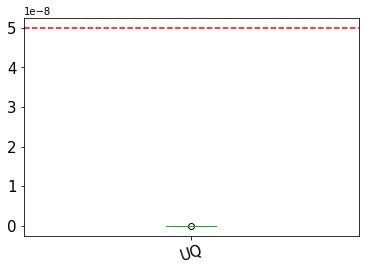

In [1352]:
df = pd.DataFrame({"UQ": KruskalPvalue})
df.boxplot(grid=False, rot=18, fontsize=15)
left, right = plt.xlim()
reference = [.00000005]
plt.hlines(reference, xmin=left, xmax=right, color='r', linestyles='--')
#plt.subplots_adjust(bottom=0.05)
#plt.ylim(0, 1)
plt.show()

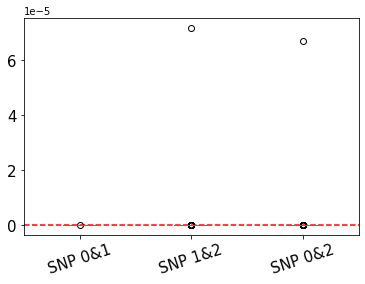

In [1358]:
df = pd.DataFrame({"SNP 0&1": mannwhitneyPvalueUpB0_B1,
                   "SNP 1&2": mannwhitneyPvalueUpB1_B2,
                  "SNP 0&2": mannwhitneyPvalueUpB0_B2})
df.boxplot(grid=False, rot=18, fontsize=15)
left, right = plt.xlim()
reference = [.00000005]
plt.hlines(reference, xmin=left, xmax=right, color='r', linestyles='--')
#plt.subplots_adjust(bottom=0.05)
#plt.ylim(0, 0.00000005)
plt.show()

In [ ]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    ax.set_title(df.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

<ipython-input-1335-f7054dae0a37>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=[3,3])


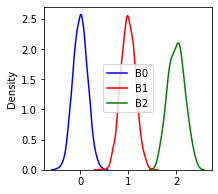

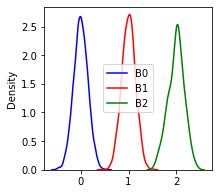

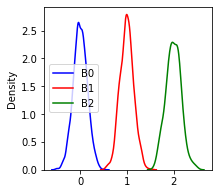

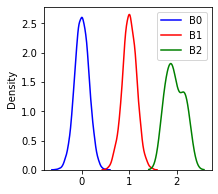

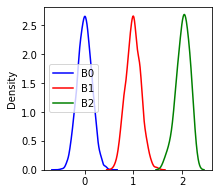

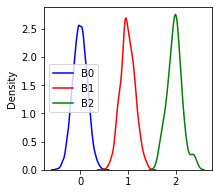

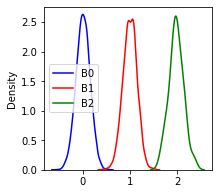

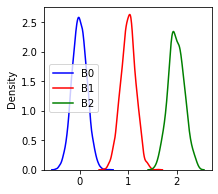

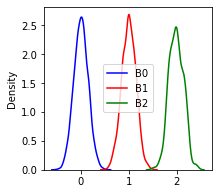

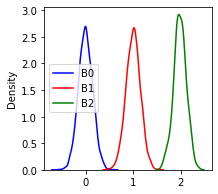

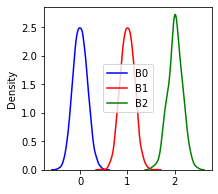

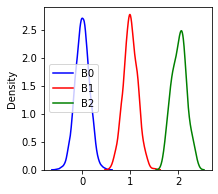

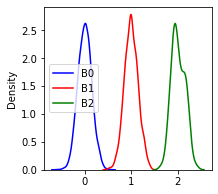

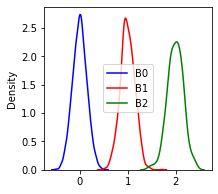

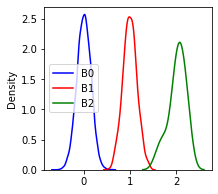

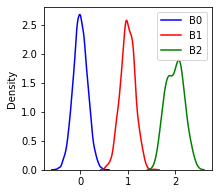

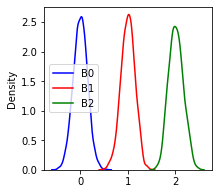

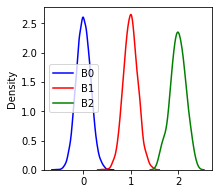

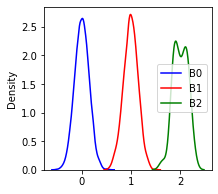

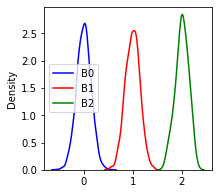

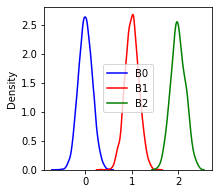

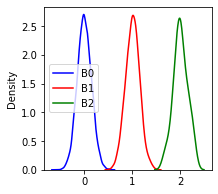

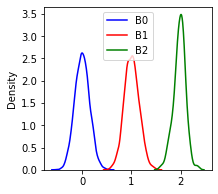

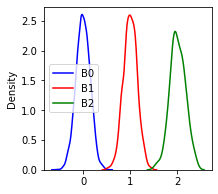

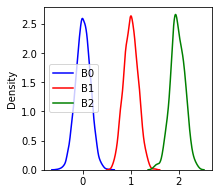

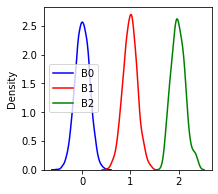

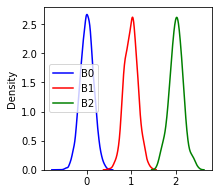

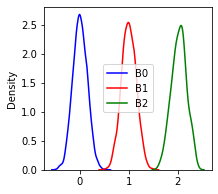

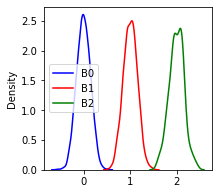

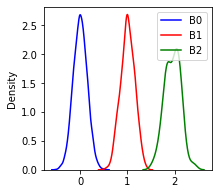

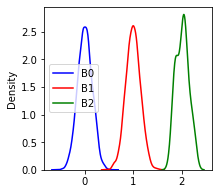

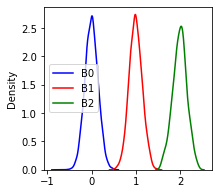

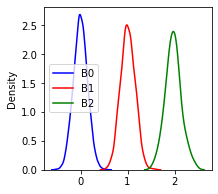

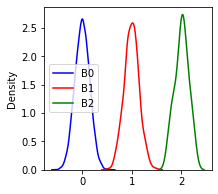

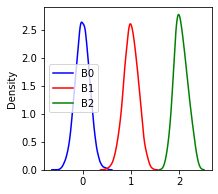

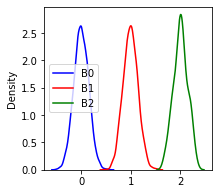

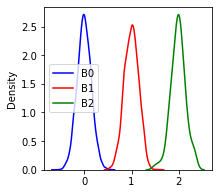

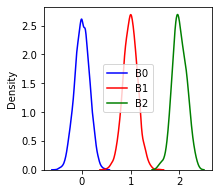

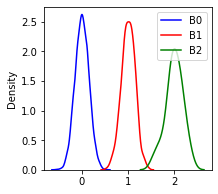

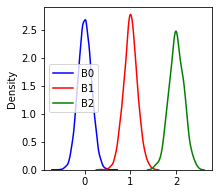

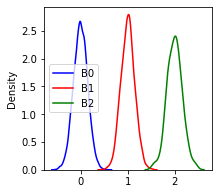

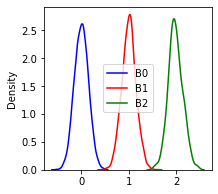

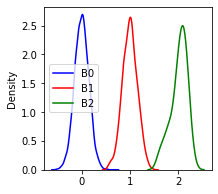

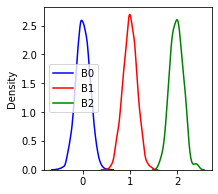

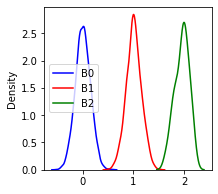

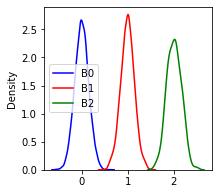

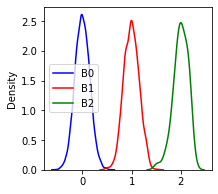

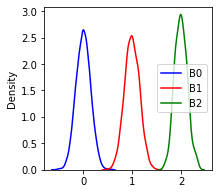

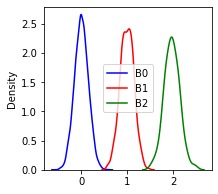

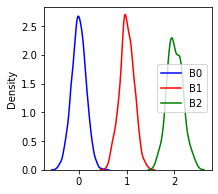

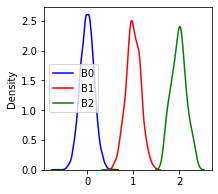

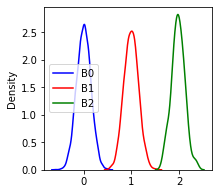

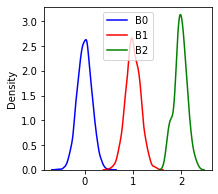

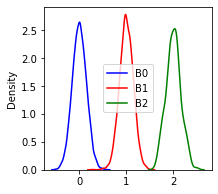

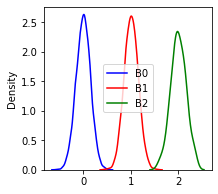

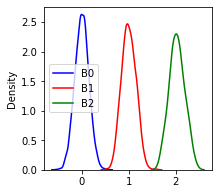

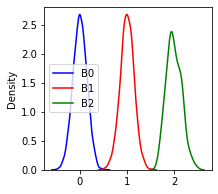

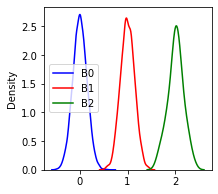

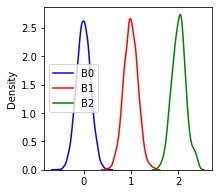

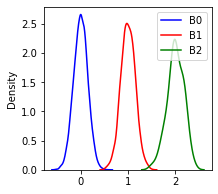

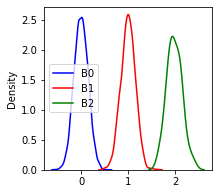

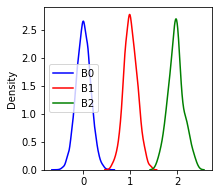

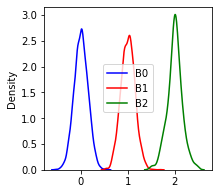

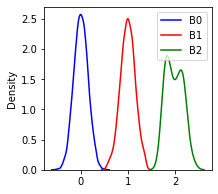

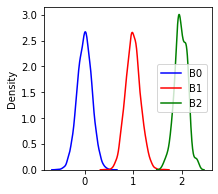

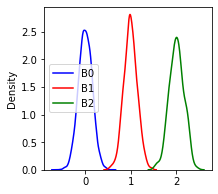

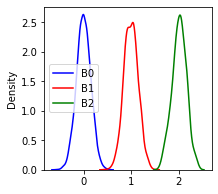

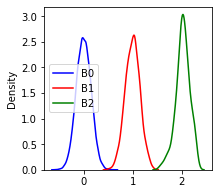

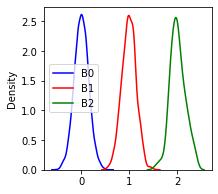

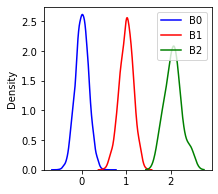

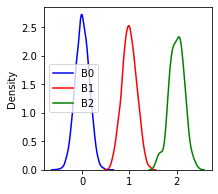

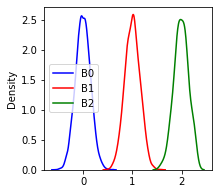

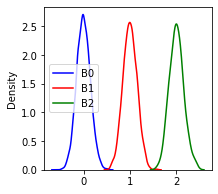

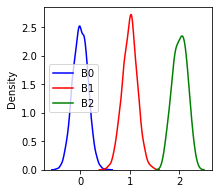

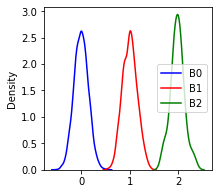

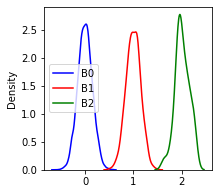

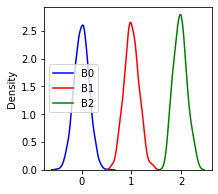

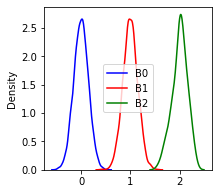

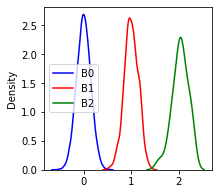

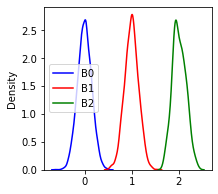

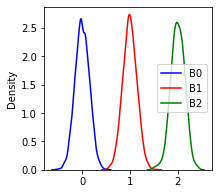

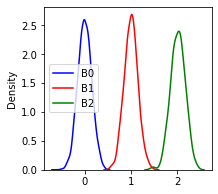

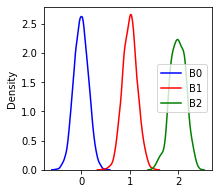

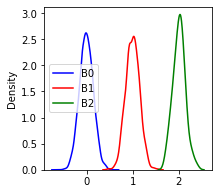

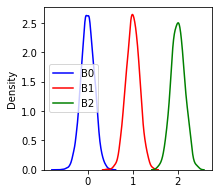

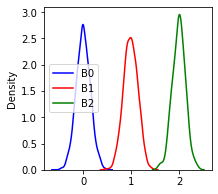

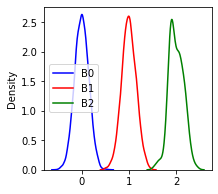

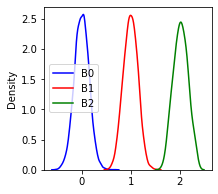

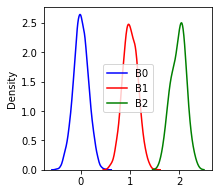

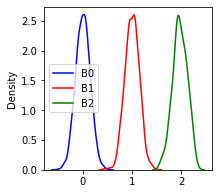

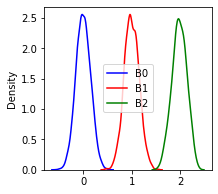

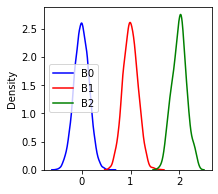

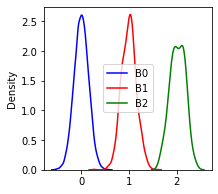

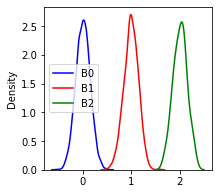

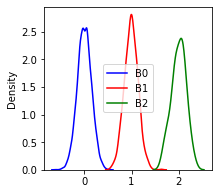

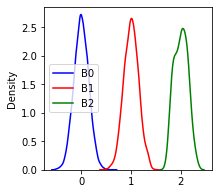

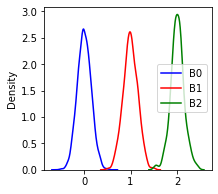

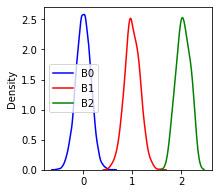

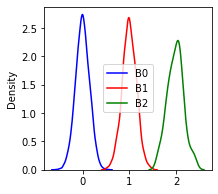

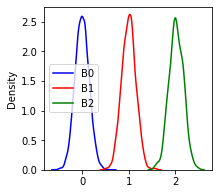

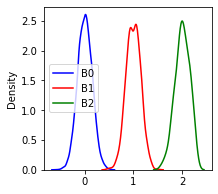

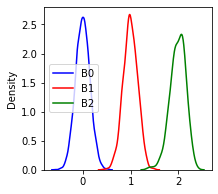

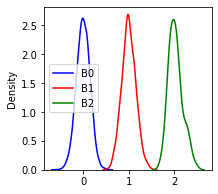

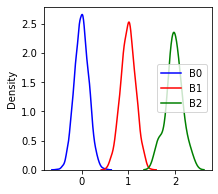

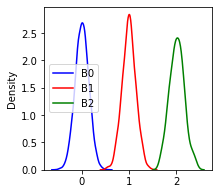

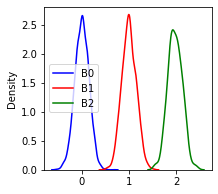

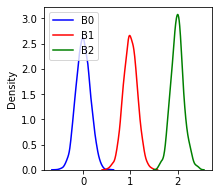

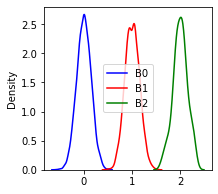

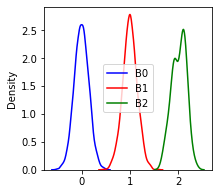

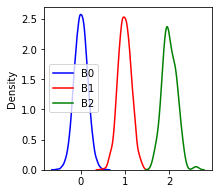

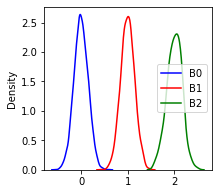

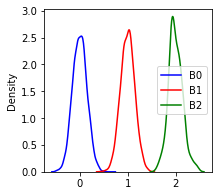

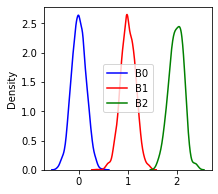

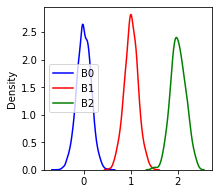

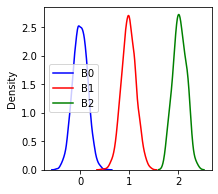

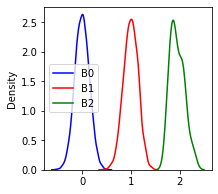

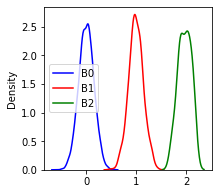

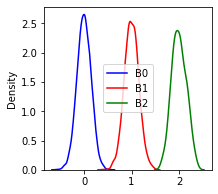

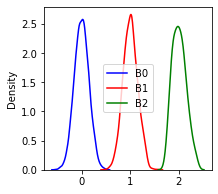

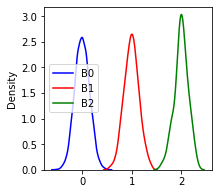

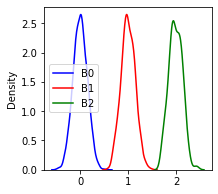

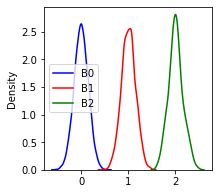

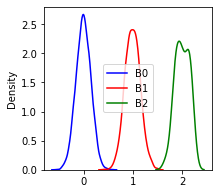

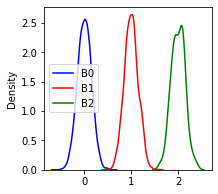

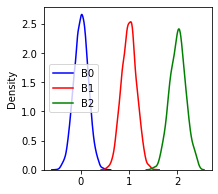

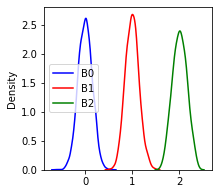

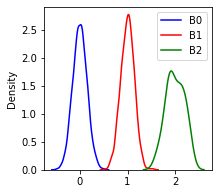

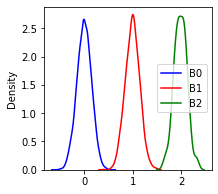

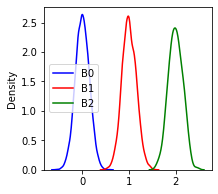

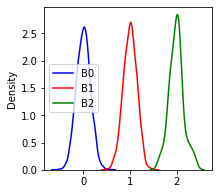

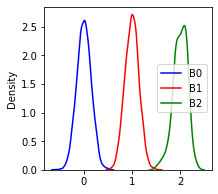

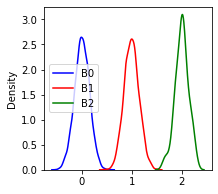

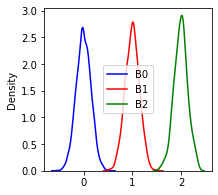

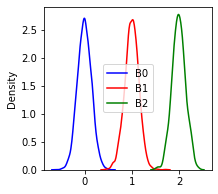

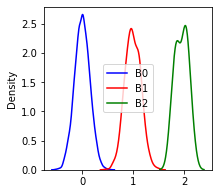

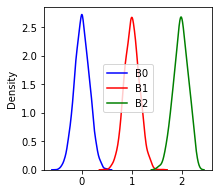

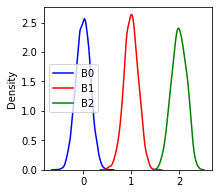

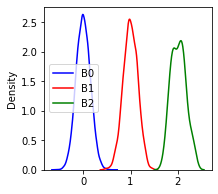

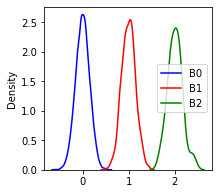

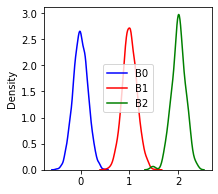

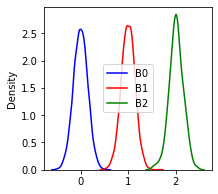

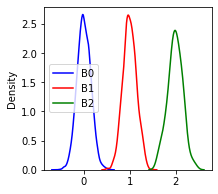

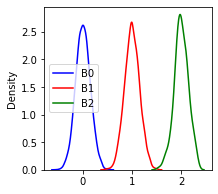

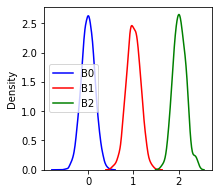

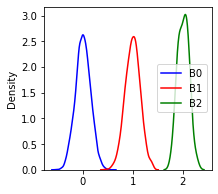

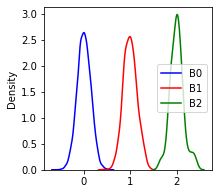

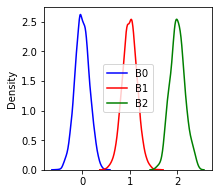

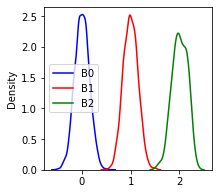

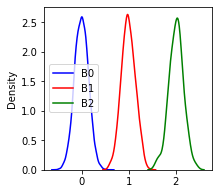

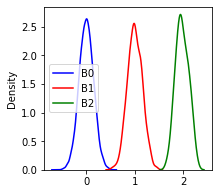

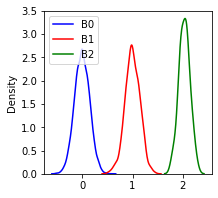

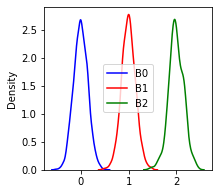

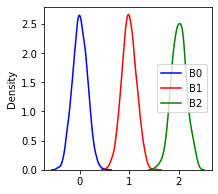

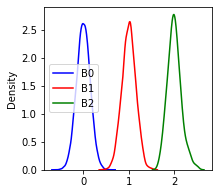

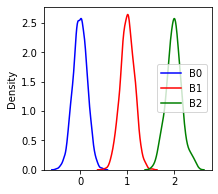

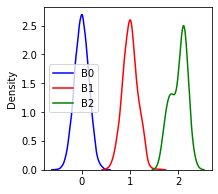

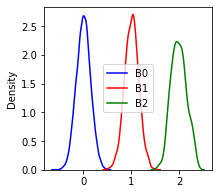

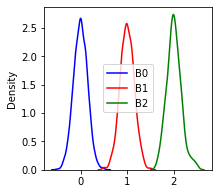

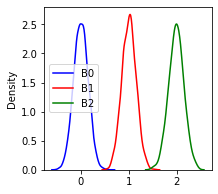

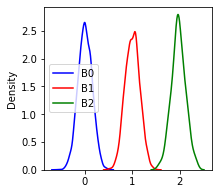

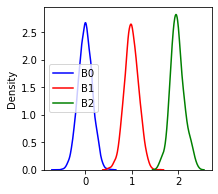

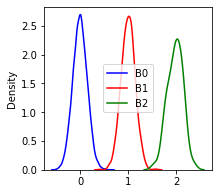

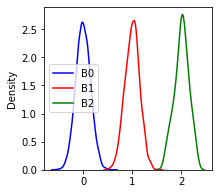

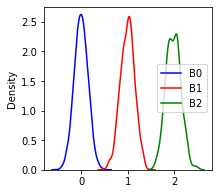

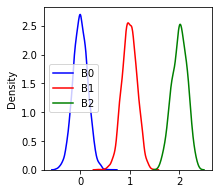

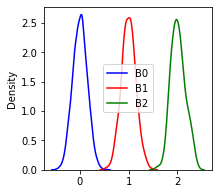

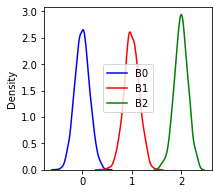

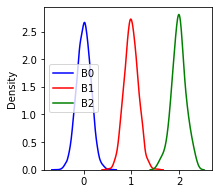

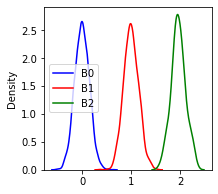

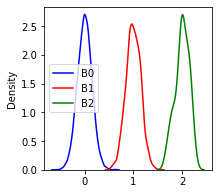

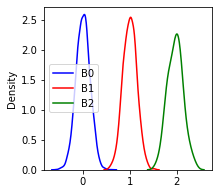

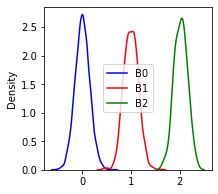

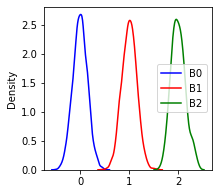

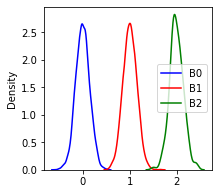

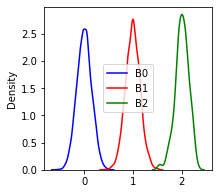

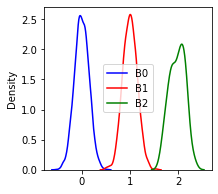

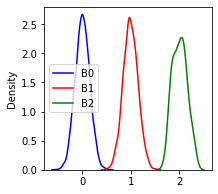

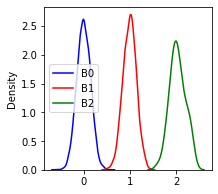

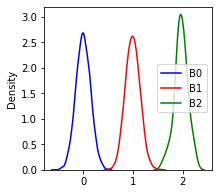

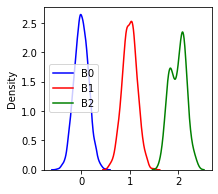

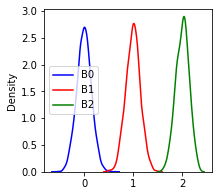

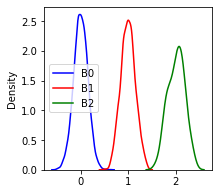

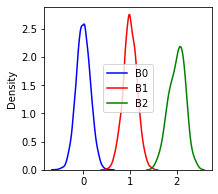

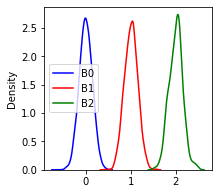

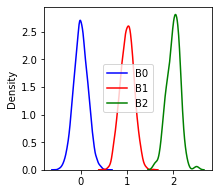

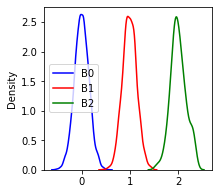

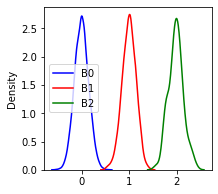

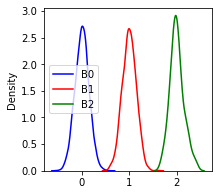

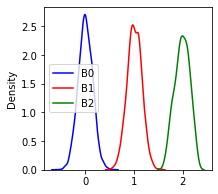

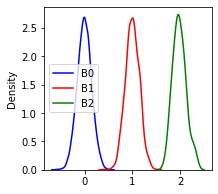

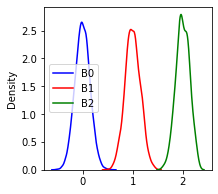

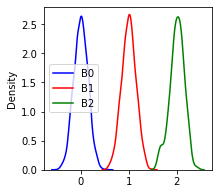

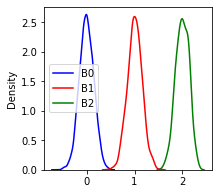

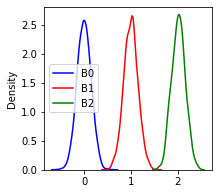

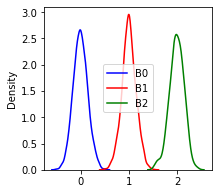

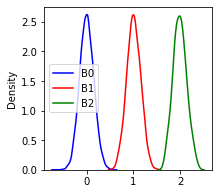

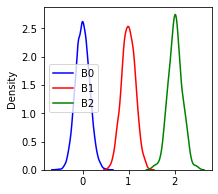

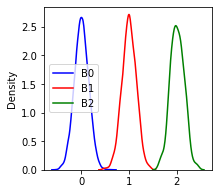

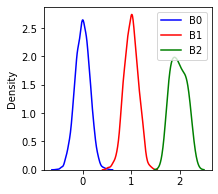

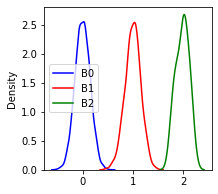

In [1335]:

for j in range(nIter):
    
    plt.figure(figsize=[3,3])
    plt.subplot()
     
    ax=sns.kdeplot(B[0:int(N[0,j]),j],color='b',label='B0',alpha=0.5)
    ax=sns.kdeplot(B[int(N[0,j]):int(N[1,j])+int(N[0,j]),j] ,color='r',label='B1')
    ax=sns.kdeplot(B[int(N[1,j])+int(N[0,j]):nSamp,j],color='g',label='B2')
    ax.legend()

<ipython-input-1290-6dc75bc512d4>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=[3,3])


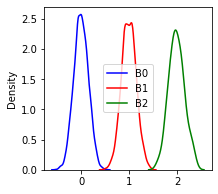

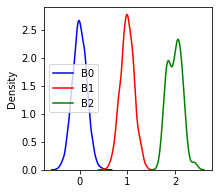

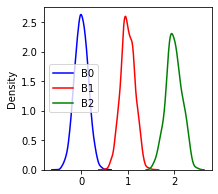

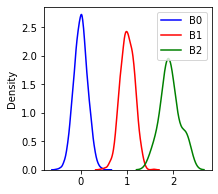

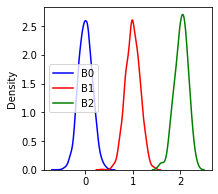

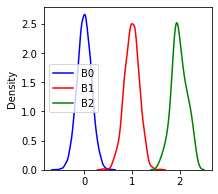

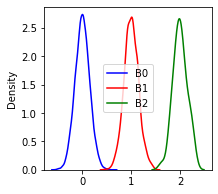

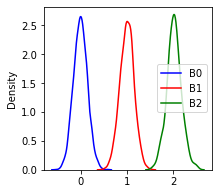

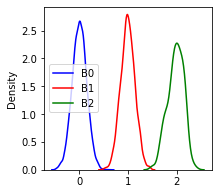

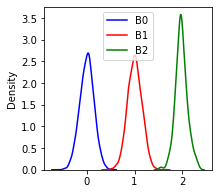

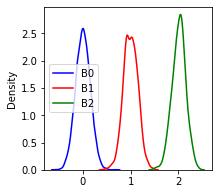

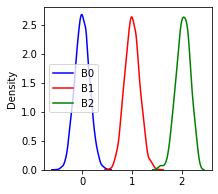

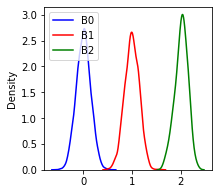

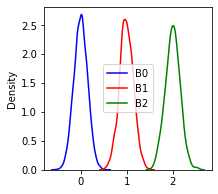

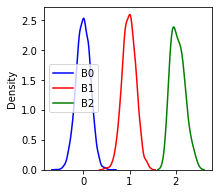

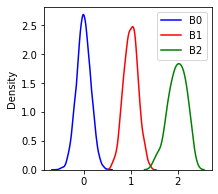

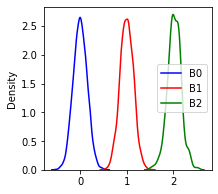

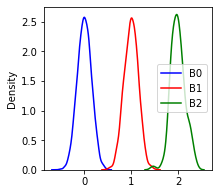

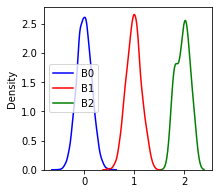

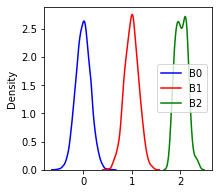

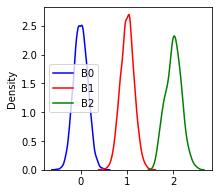

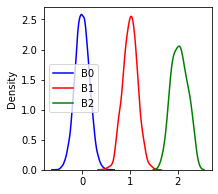

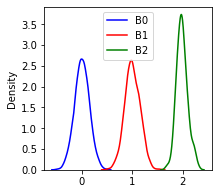

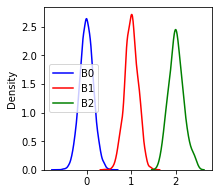

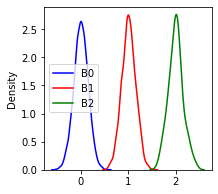

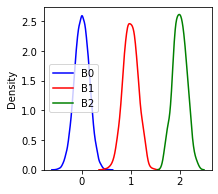

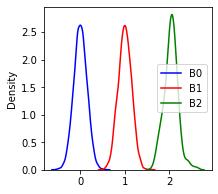

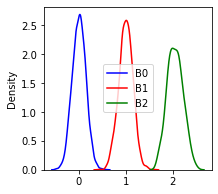

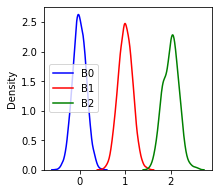

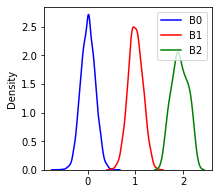

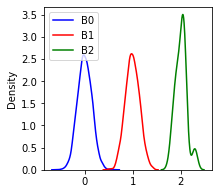

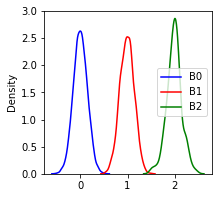

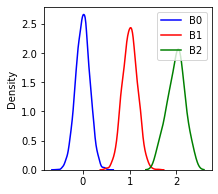

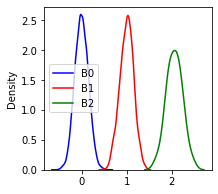

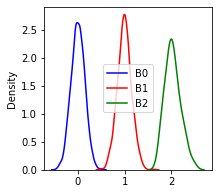

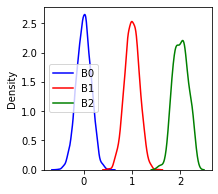

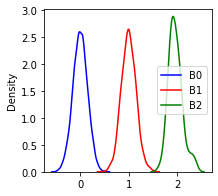

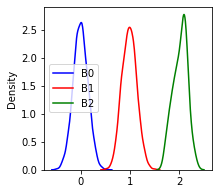

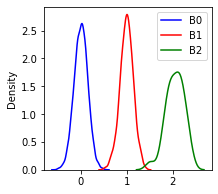

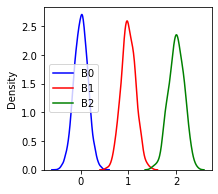

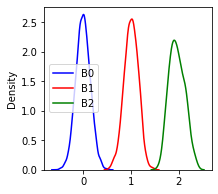

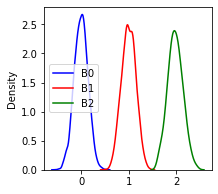

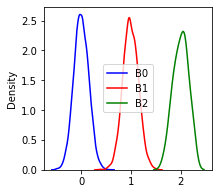

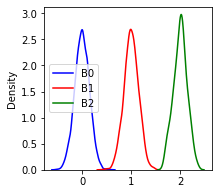

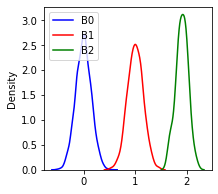

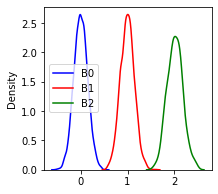

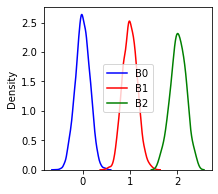

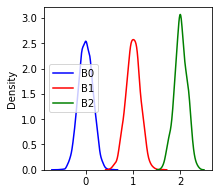

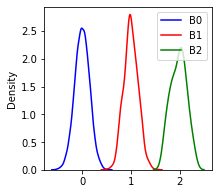

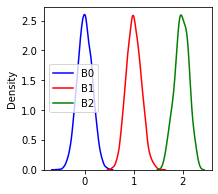

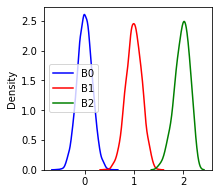

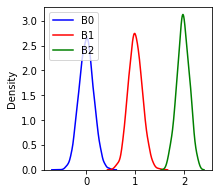

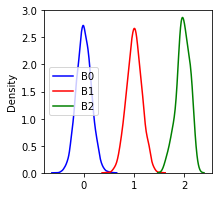

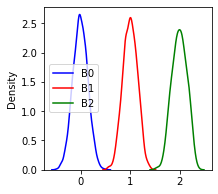

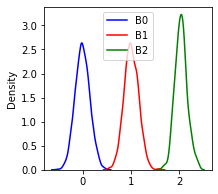

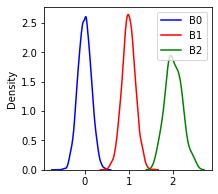

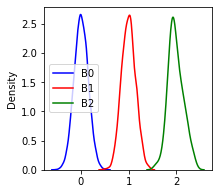

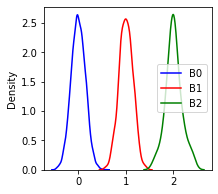

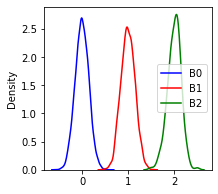

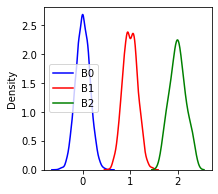

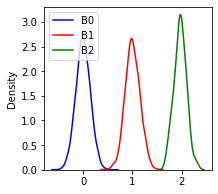

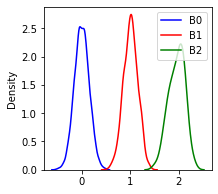

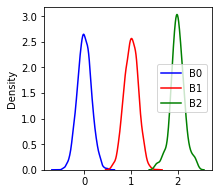

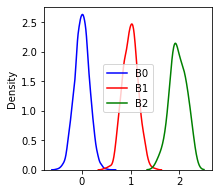

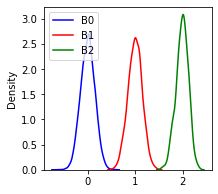

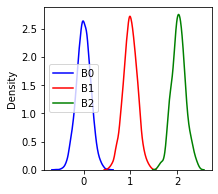

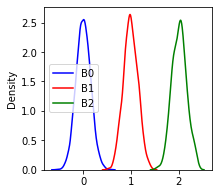

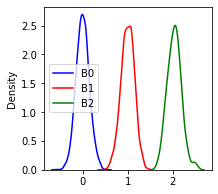

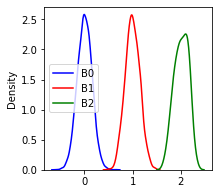

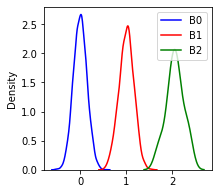

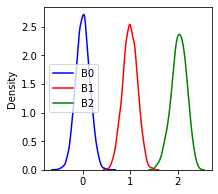

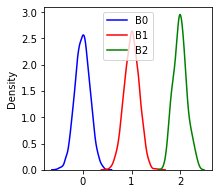

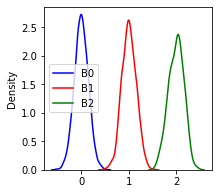

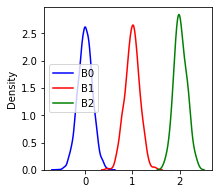

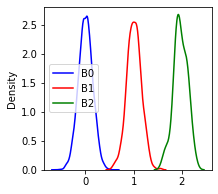

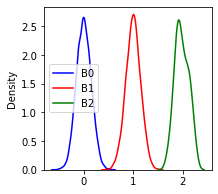

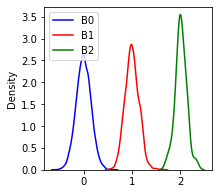

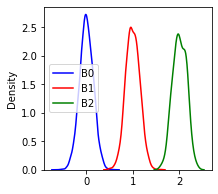

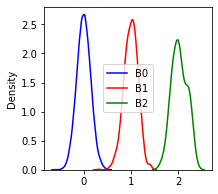

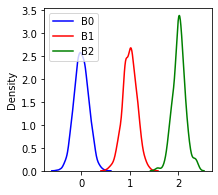

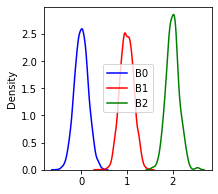

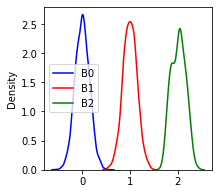

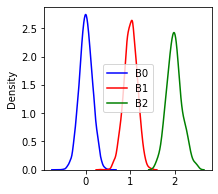

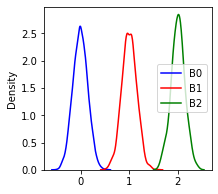

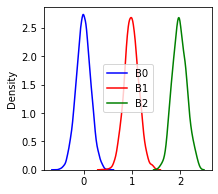

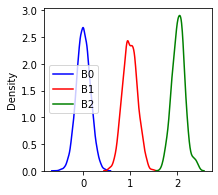

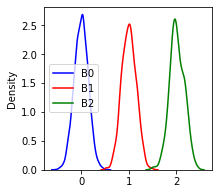

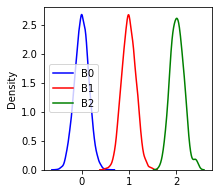

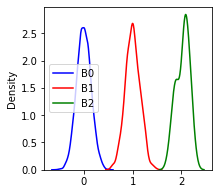

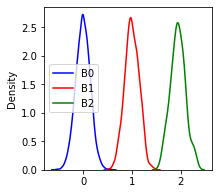

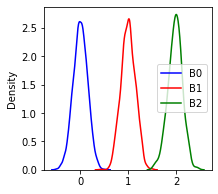

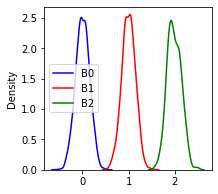

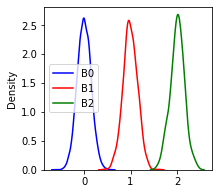

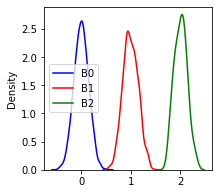

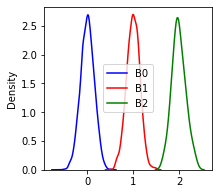

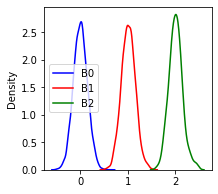

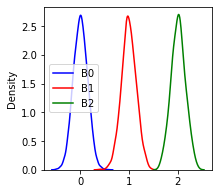

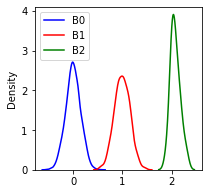

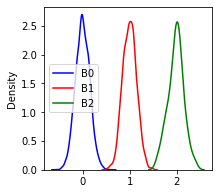

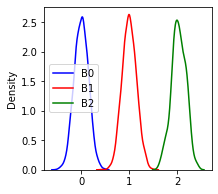

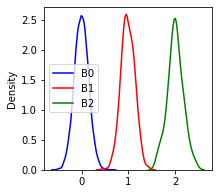

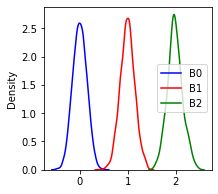

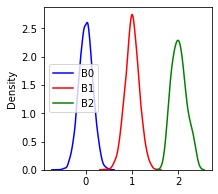

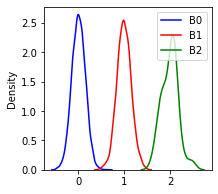

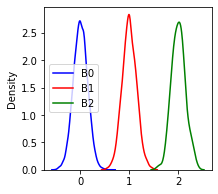

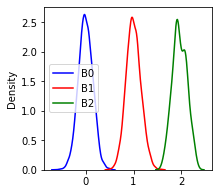

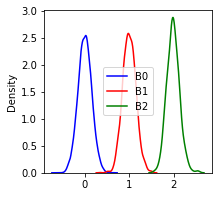

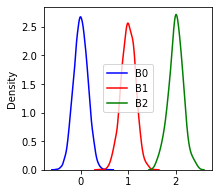

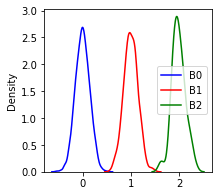

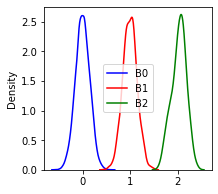

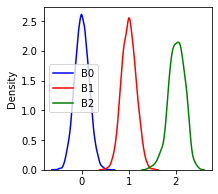

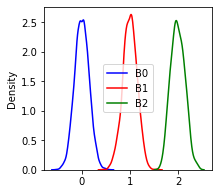

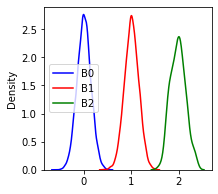

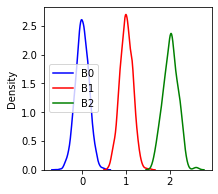

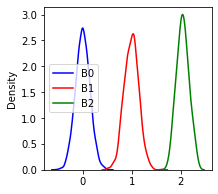

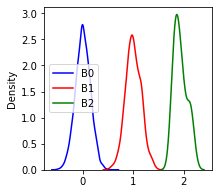

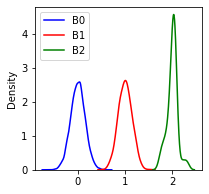

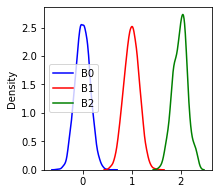

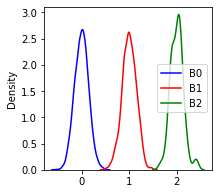

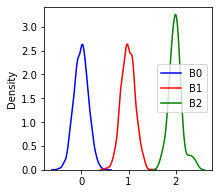

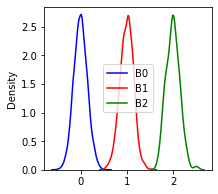

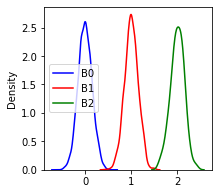

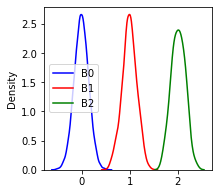

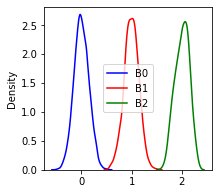

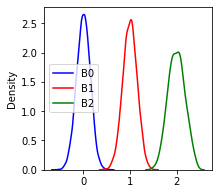

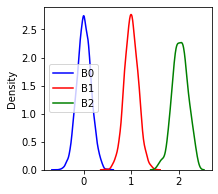

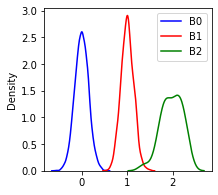

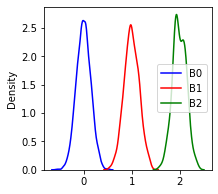

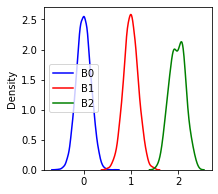

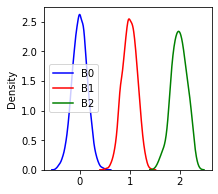

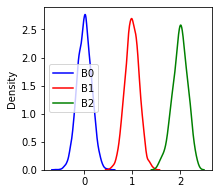

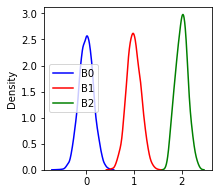

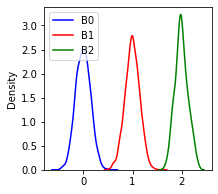

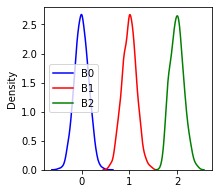

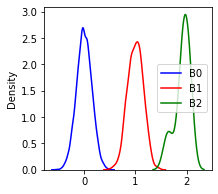

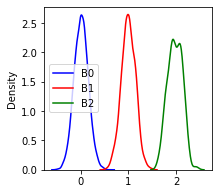

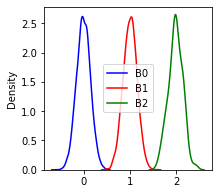

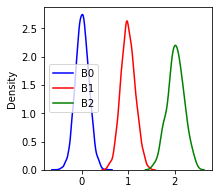

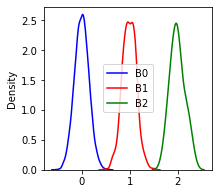

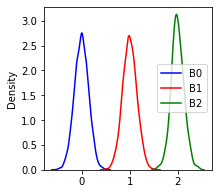

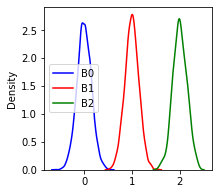

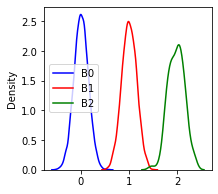

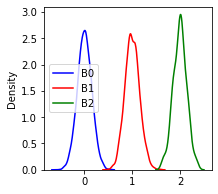

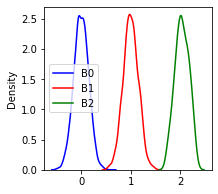

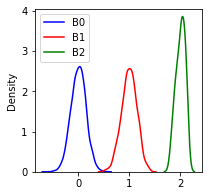

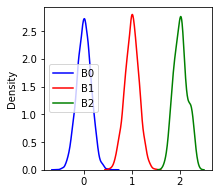

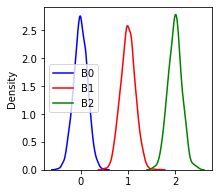

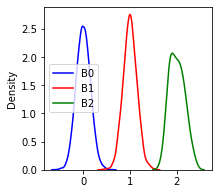

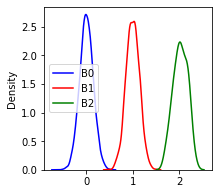

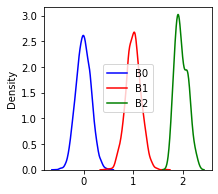

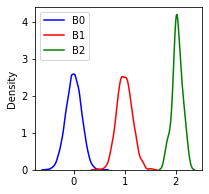

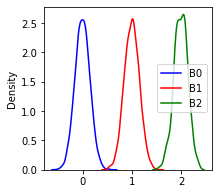

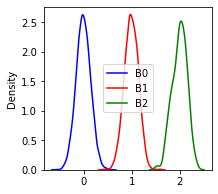

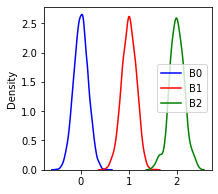

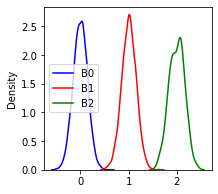

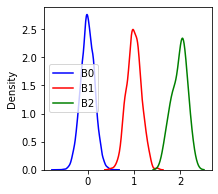

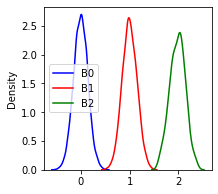

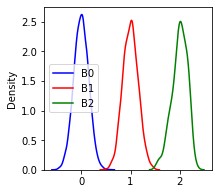

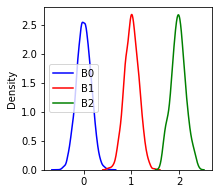

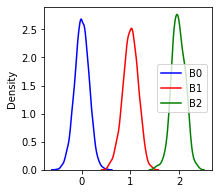

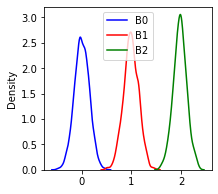

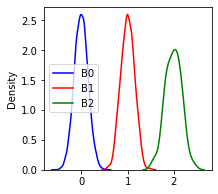

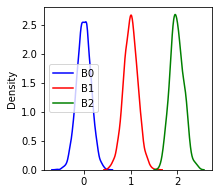

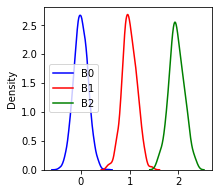

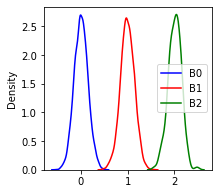

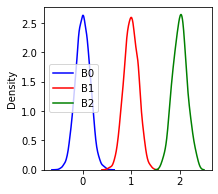

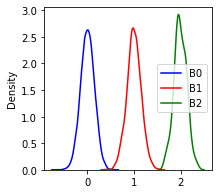

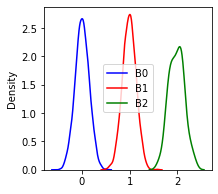

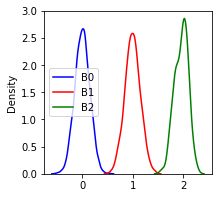

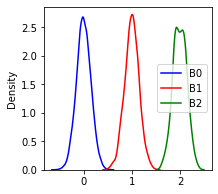

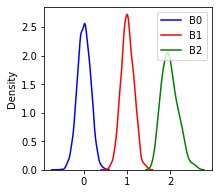

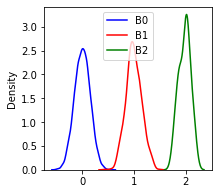

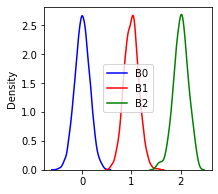

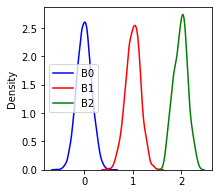

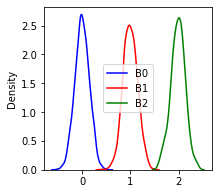

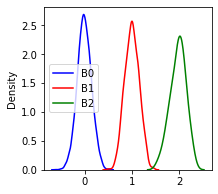

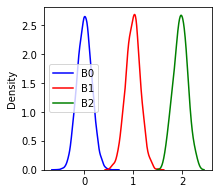

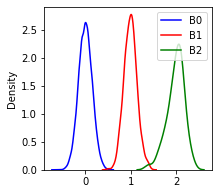

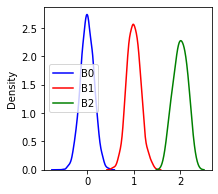

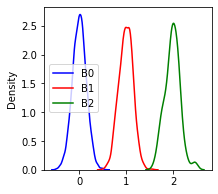

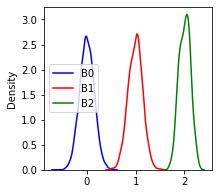

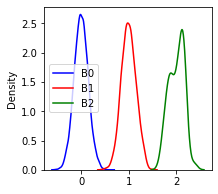

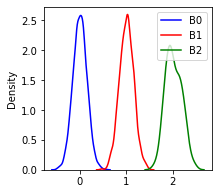

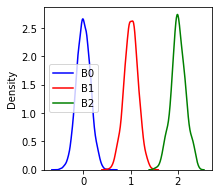

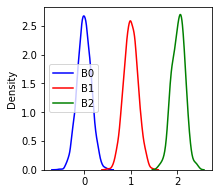

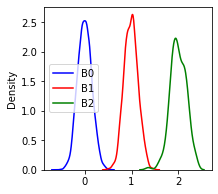

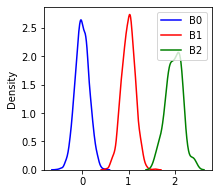

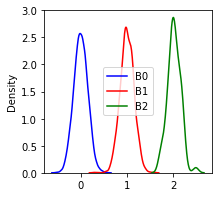

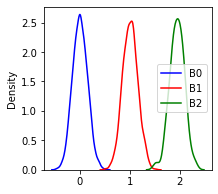

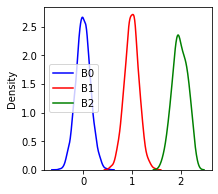

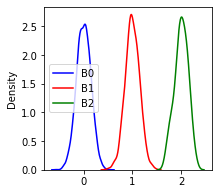

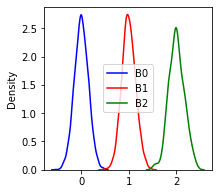

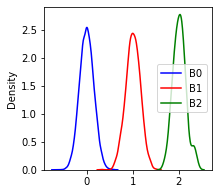

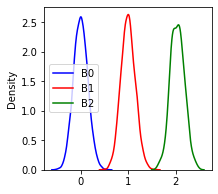

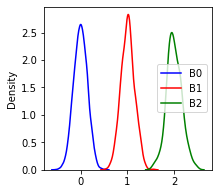

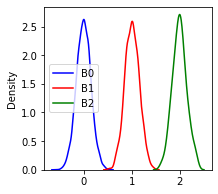

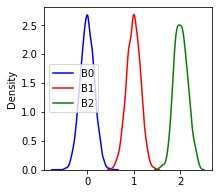

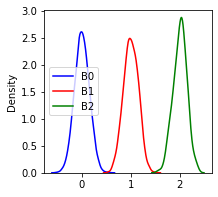

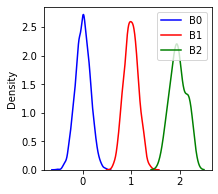

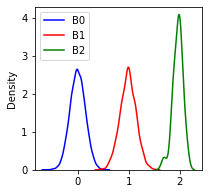

In [1290]:

for j in range(nIter):
    
    plt.figure(figsize=[3,3])
    plt.subplot()
     
    ax=sns.kdeplot(Beta[0:int(N[0,j]),j],color='b',label='B0',alpha=0.5)
    ax=sns.kdeplot(Beta[int(N[0,j]):int(N[1,j])+int(N[0,j]),j] ,color='r',label='B1')
    ax=sns.kdeplot(Beta[int(N[1,j])+int(N[0,j]):nSamp,j],color='g',label='B2')
    ax.legend()

<ipython-input-1291-ad2de2a30038>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=[3,3])


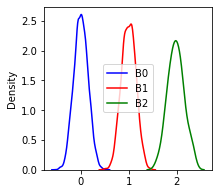

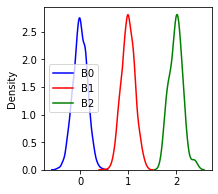

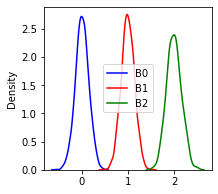

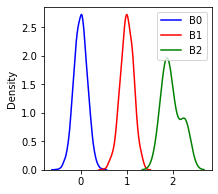

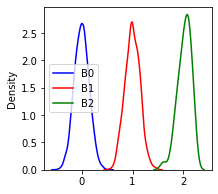

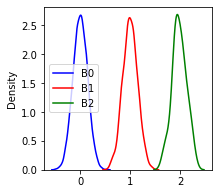

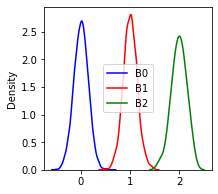

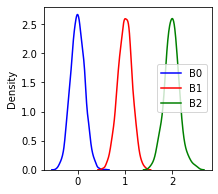

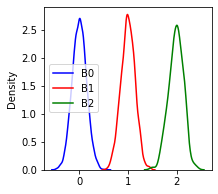

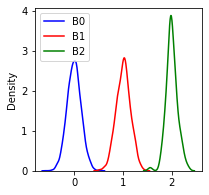

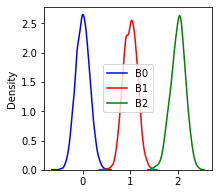

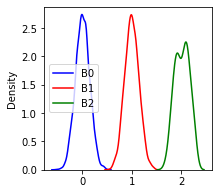

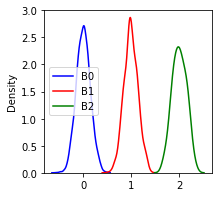

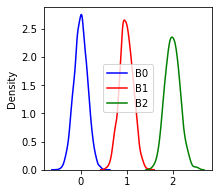

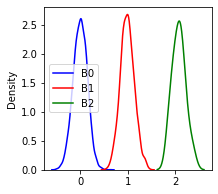

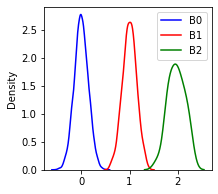

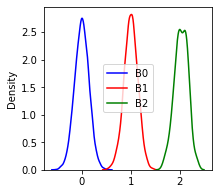

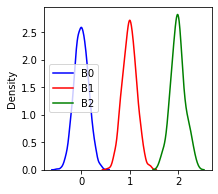

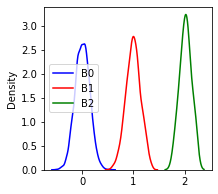

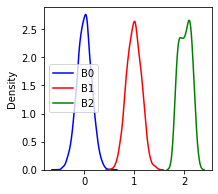

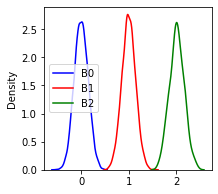

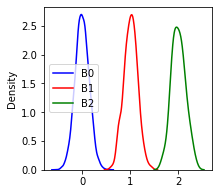

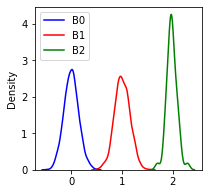

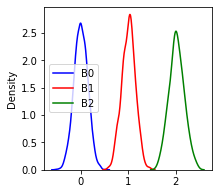

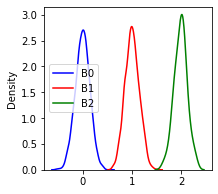

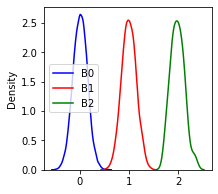

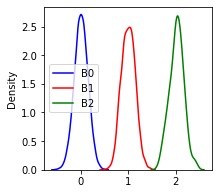

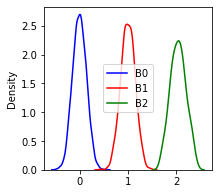

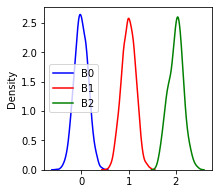

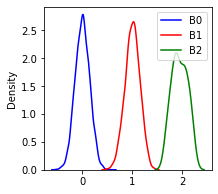

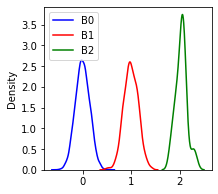

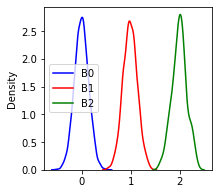

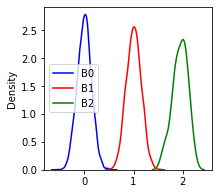

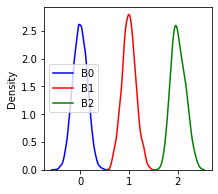

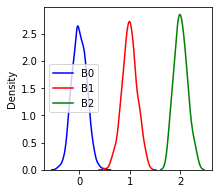

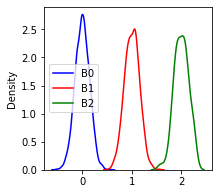

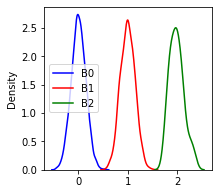

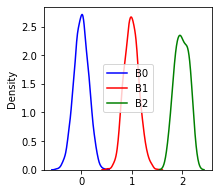

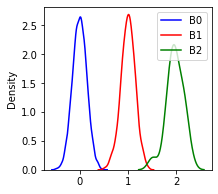

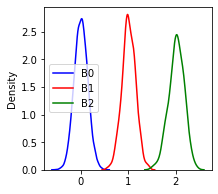

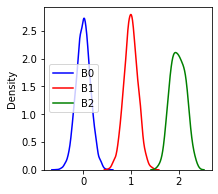

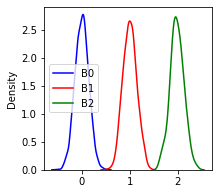

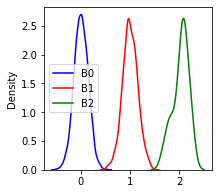

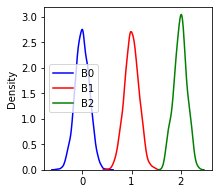

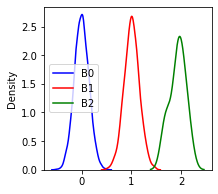

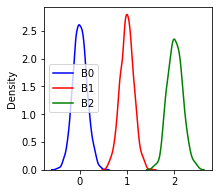

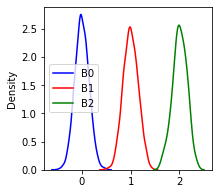

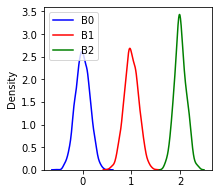

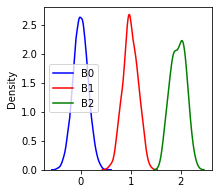

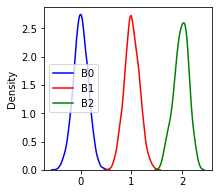

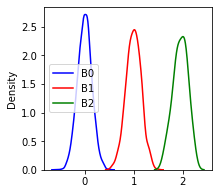

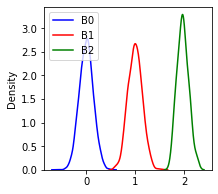

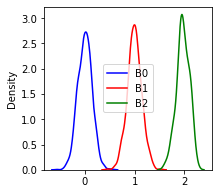

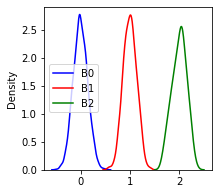

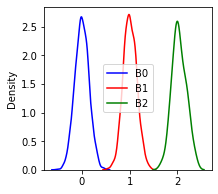

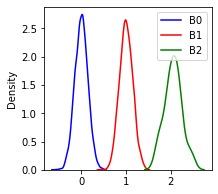

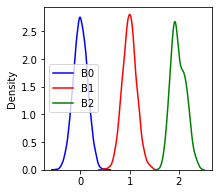

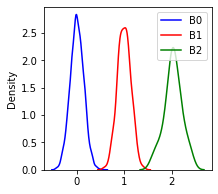

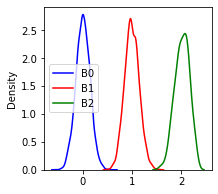

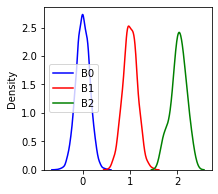

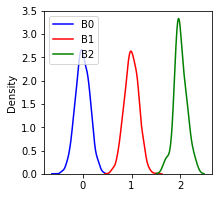

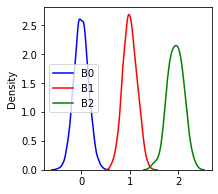

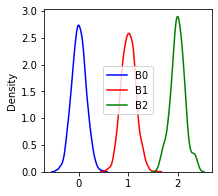

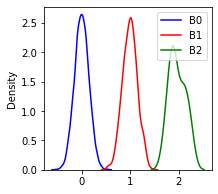

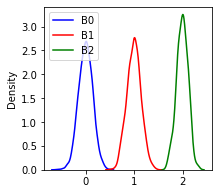

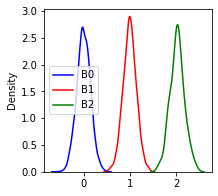

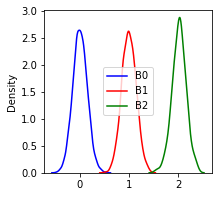

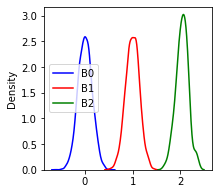

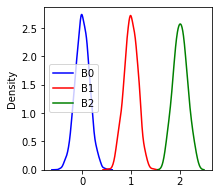

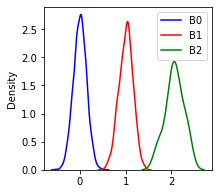

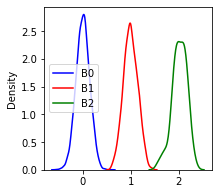

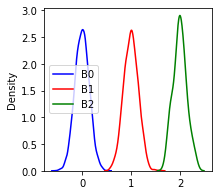

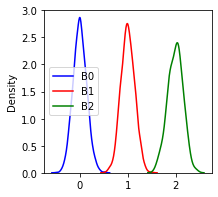

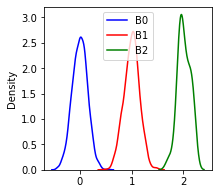

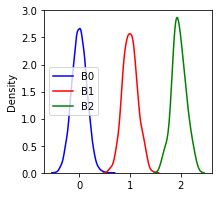

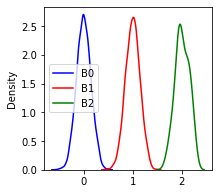

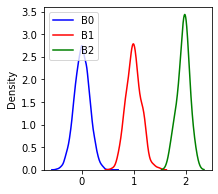

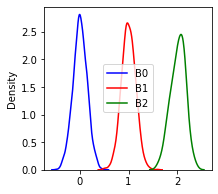

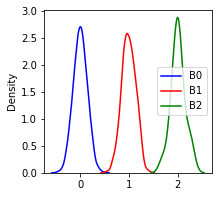

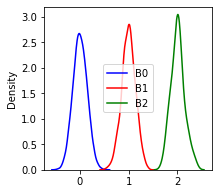

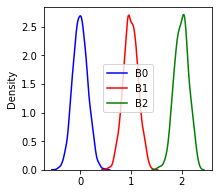

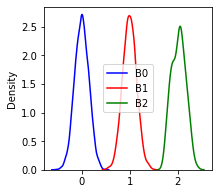

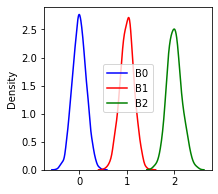

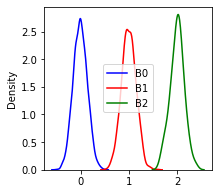

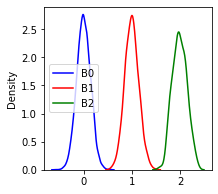

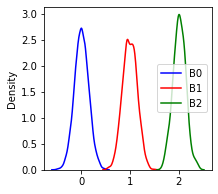

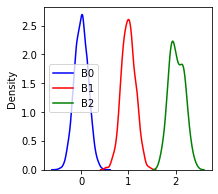

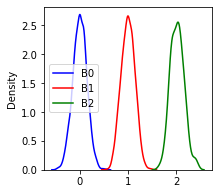

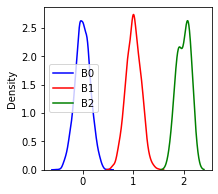

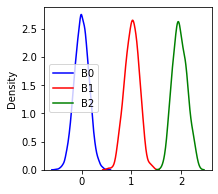

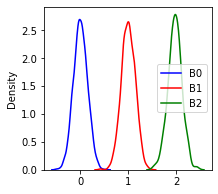

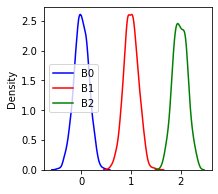

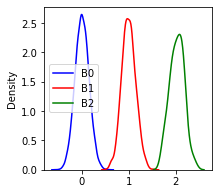

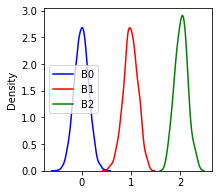

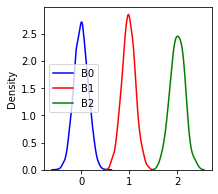

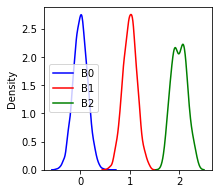

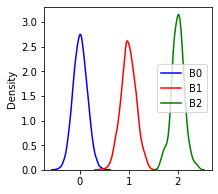

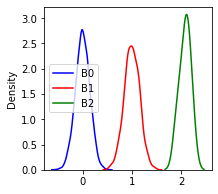

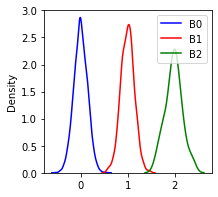

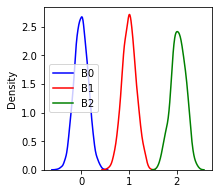

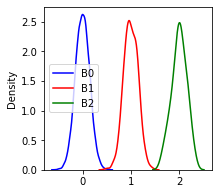

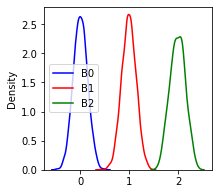

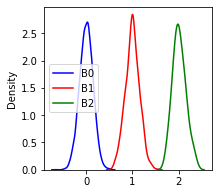

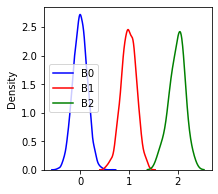

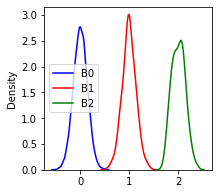

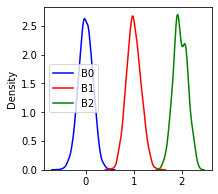

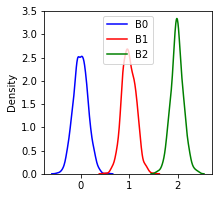

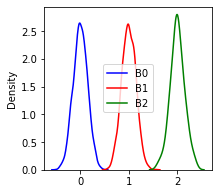

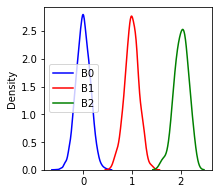

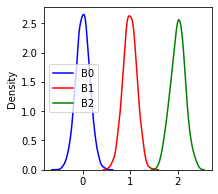

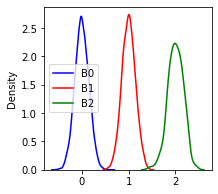

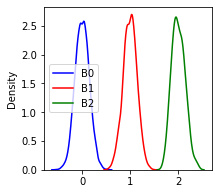

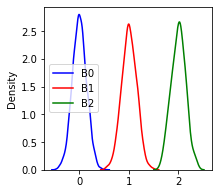

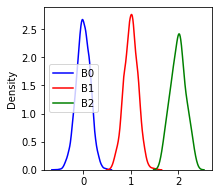

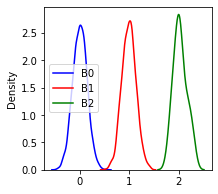

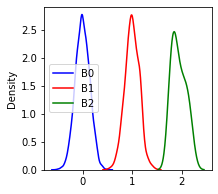

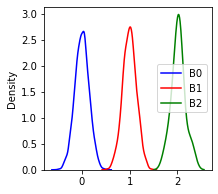

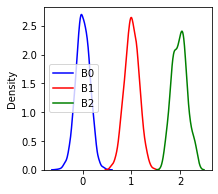

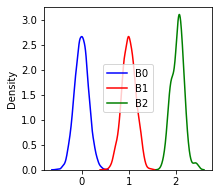

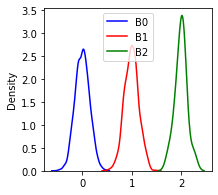

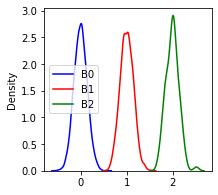

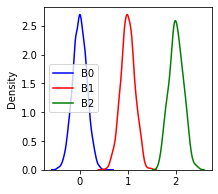

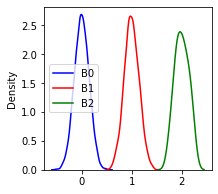

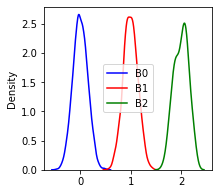

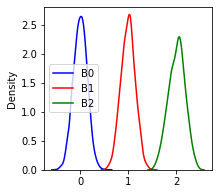

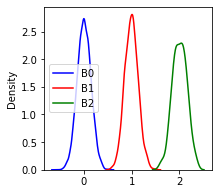

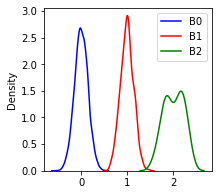

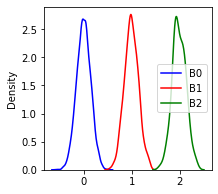

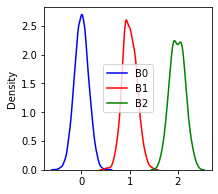

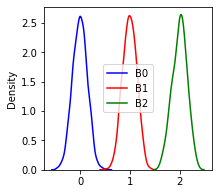

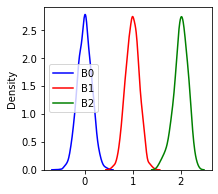

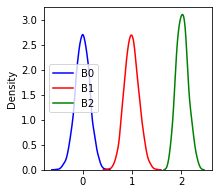

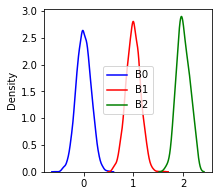

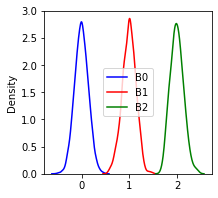

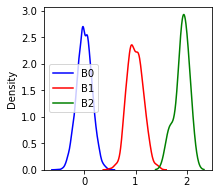

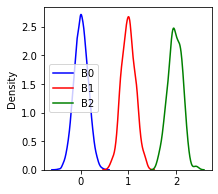

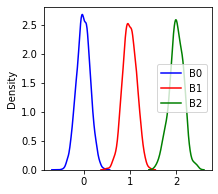

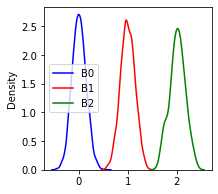

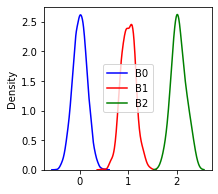

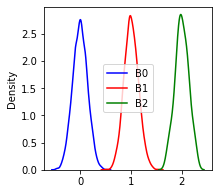

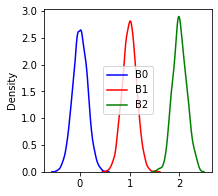

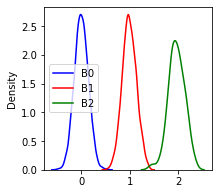

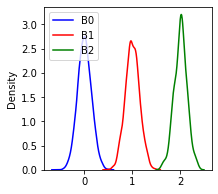

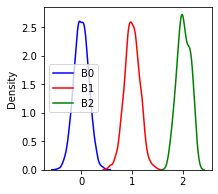

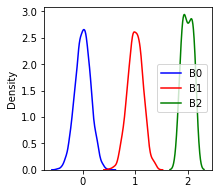

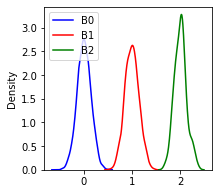

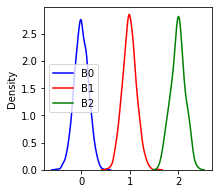

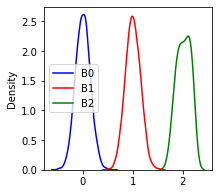

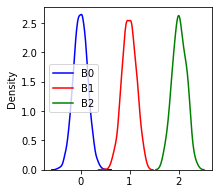

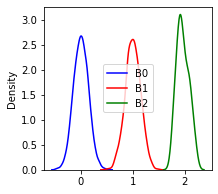

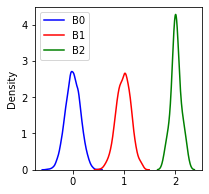

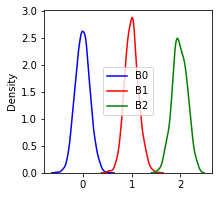

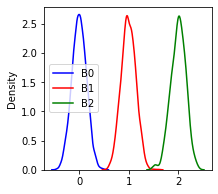

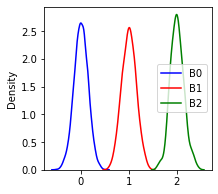

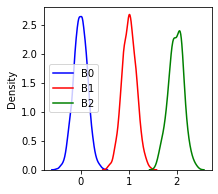

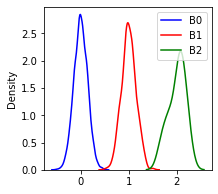

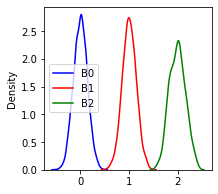

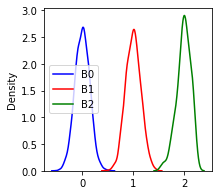

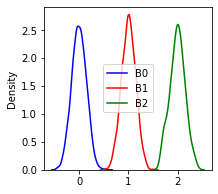

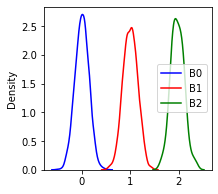

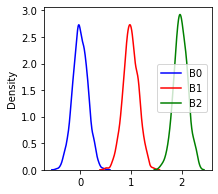

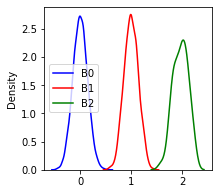

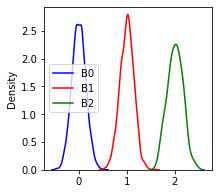

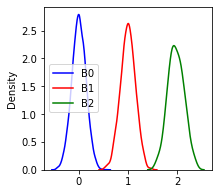

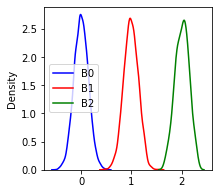

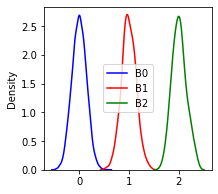

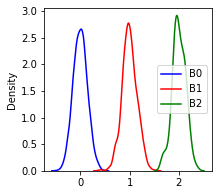

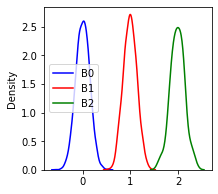

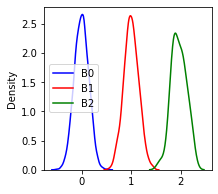

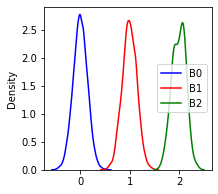

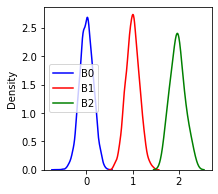

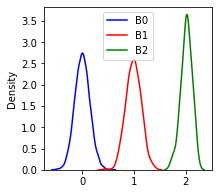

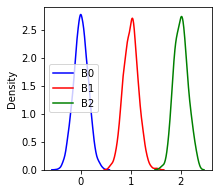

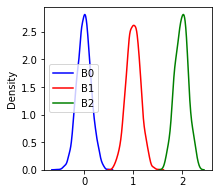

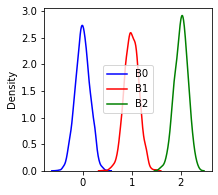

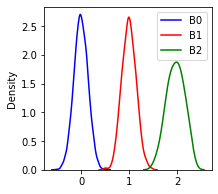

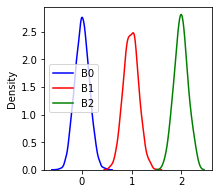

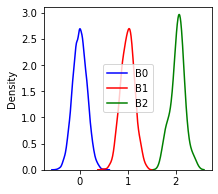

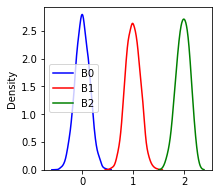

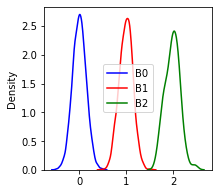

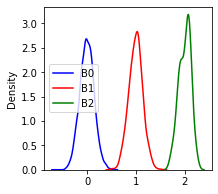

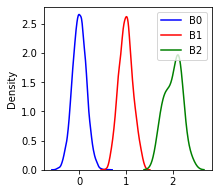

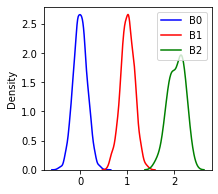

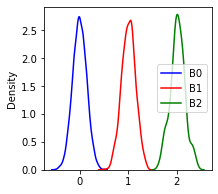

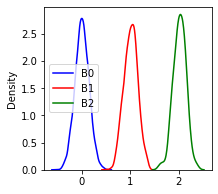

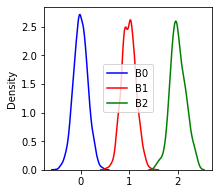

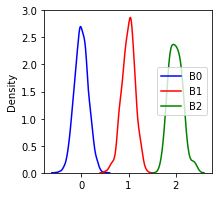

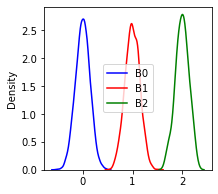

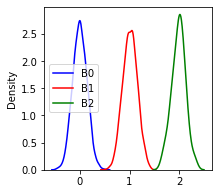

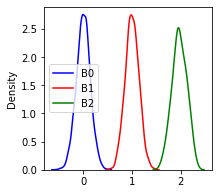

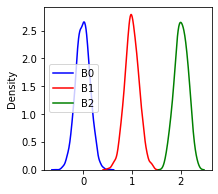

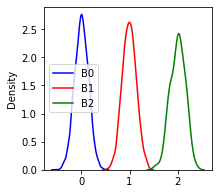

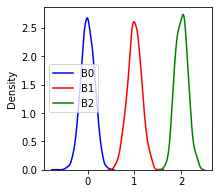

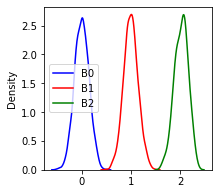

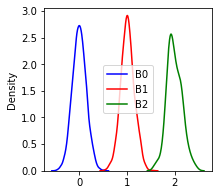

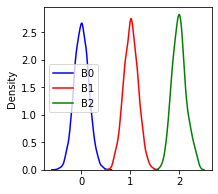

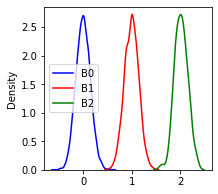

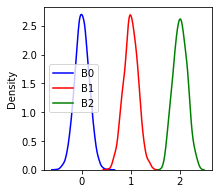

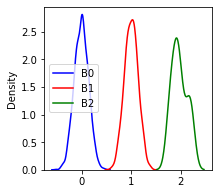

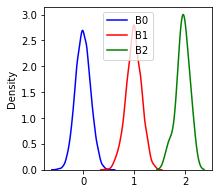

In [1291]:
for j in range(nIter):
    
    plt.figure(figsize=[3,3])
    plt.subplot()
     
    ax=sns.kdeplot(updated_Beta[0:int(samples_to_keepSize[0,j]),j] ,color='b',label='B0',alpha=0.5)
    ax=sns.kdeplot(updated_Beta[int(samples_to_keepSize[0,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]),j] ,color='r',label='B1')
    ax=sns.kdeplot(updated_Beta[int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j]):int(samples_to_keepSize[0,j])+int(samples_to_keepSize[1,j])+int(samples_to_keepSize[2,j]),j] ,color='g',label='B2')
    ax.legend()